# Data Scientist Professional Practical Exam Submission

## Table of Contents
- [Introduction](#introduction)
- [Data Validation](#data-validation)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Model Development and Evaluation](#model-development-evaluation)
- [Results](#results)
- [Recommendations](#recommendations)

## Introduction

Tasty Bytes initially started as a recipe search engine, helping users find recipes based on ingredients they already had at home. The company has since evolved into a subscription-based platform that provides customers with full meal plans, ensuring individuals and families receive healthy, balanced diets tailored to their budgets.

This report presents the analysis for Tasty Bytes to predict which recipes will be popular 80% of the time and minimise the chance of showing unpopular recipes. Currently, recipe selection is subjective, but this analysis will enable a data-driven approach to feature popular recipes more effectively. A popular recipe on the home page increases traffic to the rest of the website by as much as 40%. Analytically choosing the recipe to display is essential as an increase in traffic will imply more subscriptions.

This analysis outlines the steps taken to validate the data and develop the predictive model. The analysis, data-driven insights, and recommendations in this report are intended to support Tasty Bytes in transitioning to a model-based recipe selection process for their homepage.

## Data Validation

This section outlines the required format of the dataset and details the steps taken to ensure it is correctly structured. The dataset comprises 947 rows and 8 columns.

Desired Format:

| Field         | Data Type         | Description                                                                      |
|---------------|-------------------|----------------------------------------------------------------------------------|
| `recipe`        | INT               | Unique identifier of recipe                                                      |
| `calories`      | FLOAT             | Number of calories                                                               |
| `carbohydrate`  | FLOAT             | Amount of carbohydrates in grams                                                 |
| `sugar`         | FLOAT             | Amount of sugar in grams                                                         |
| `protein`       | FLOAT             | Amount of protein in grams                                                       |
| `category`      | Categorical | Type of recipe, one of: 'Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal'   |             |
| `servings`      | INT               | Number of servings for the recipe                                                |
| `high_traffic`  | BOOL              | Indicates if the recipe is high traffic (`True`) or low traffic (`False`) |

### Missing Data

![MSNO Plot](msno.png)

There are four columns in the dataset with missing values: `calories`, `carbohydrate`, `sugar`, and `protein`, along with the `high-traffic` column. The first four columns have 52 entries missing, while the `high-traffic` column has 373 missing entries. The missingno analysis indicates that the missing data in the nutritional features are not completely random and are related to one another, which is confirmed by the fact that all 52 missing entries in the first four columns correspond with each other.

There are several ways to address this issue, but I have chosen to drop rows with missing data in these four columns. This decision is based on the fact that the missing data constitutes approximately 5% of the total dataset. Imputing values for four different columns could potentially distort the dataset and introduce bias.

After cleaning the nutritional features, the high_traffic column still contains 360 missing entries, which represents approximately 40% of the remaining dataset. After further exploration of the high_traffic column, the data contains only `'High'` and `NaN` values. It is reasonable to assume that the `NaN` entries should be categorized as `Low`. This assumption is essential for our analysis, as there is no existing data indicating low traffic without this classification. Additionally, removing these entries would significantly reduce our dataset, leaving us with insufficient data to analyse low-traffic conditions effectively.

![MSNO Clean Plot](msno_clean.png)


### Dataframe Format

Steps taken to ensure dataframe in required format:
-  `recipe`: Already in desired format - `int64`. Also all values are positive and unique.
-  `calories`: Already in desirec format - `float64`. Also all values are positive/zero.
-  `carbohydrate`: Already in desirec format - `float64`. Also all values are positive/zero.
-  `sugar`: Already in desirec format - `float64`. Also all values are positive/zero.
-  `protein`: Already in desirec format - `float64`. Also all values are positive/zero.
-  `servings`: Need to convert object to `int64`. Also need to map 3 values to integers, Like `'4 as a snack'` to `'4'`.
-  `category`: Need to convert object to 'category'. Need to map values to format in correct form. Mapped `'Chicken Breast'` to `'Chicken'`.
-  `high_traffic`: Converted `'High'` to `True`. The column only contained `'High', NaN`. Converted `NaN` to `False`. Column converted from object to Bool.

### Outliers

<div align="center">
    <img src="nutrional_boxplots.png" alt="Figure 8" width="700">
</div>

The box plots indicate that there are numerous outliers; however, these values fall within a reasonable range. The model selection will have to consider these outliers as some models like Logistic Regression are more sensitive to outliers while models like Random Forest are more robust to outliers.

In [159]:
import pandas as pd

recipe_df = pd.read_csv('recipe_site_traffic_2212.csv')

In [160]:
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [161]:
# Missing Data

## Check which columns have missing values
print("\nisna().sum()")  
print(recipe_df.isna().sum())

## Check if the missing values are all the same row for all fields
print("\nCheck if missing values are all in same row")  
print(recipe_df[['calories', 'carbohydrate', 'sugar', 'protein']].isna().all(axis=1).value_counts())

## Creating copy 
clean_recipe_df = recipe_df.copy()

# Dropping rows with missing values in specified columns
clean_recipe_df.dropna(subset=['calories', 'carbohydrate', 'sugar', 'protein'], inplace=True)

print("\nisna().sum() for Clean df")  
print(clean_recipe_df.isna().sum())


isna().sum()
recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

Check if missing values are all in same row
False    895
True      52
dtype: int64

isna().sum() for Clean df
recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    360
dtype: int64


In [162]:
# INT - conversion
print(clean_recipe_df['servings'].unique())
# print(clean_recipe_df[clean_recipe_df['servings'] == '6 as a snack'])
clean_recipe_df['servings'].replace({'4 as a snack': '4', '6 as a snack': '6'}, inplace=True)

clean_recipe_df['servings'] = pd.to_numeric(clean_recipe_df['servings'], errors='coerce').astype('int64')

# Categorical - conversion

print(clean_recipe_df['category'].unique())
clean_recipe_df['category'] = clean_recipe_df['category'].replace({'Chicken Breast': 'Chicken'})

clean_recipe_df["category"] = clean_recipe_df["category"].astype("category")

# Boolean
print(clean_recipe_df['high_traffic'].unique())
clean_recipe_df['high_traffic'] = clean_recipe_df['high_traffic'].replace('High', True).fillna(False)

### Check all floats and int are positive
positive_check = (clean_recipe_df[['calories', 'carbohydrate', 'sugar', 'protein', 'recipe', 'servings']] >= 0).all()

# Print results
for column, is_positive in positive_check.items():
    if is_positive:
        print(f"All values in '{column}' are positive or zero.")
    else:
        print(f"Not all values in '{column}' are positive or zero.")



['4' '1' '2' '6' '4 as a snack' '6 as a snack']
['Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Pork' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
['High' nan]
All values in 'calories' are positive or zero.
All values in 'carbohydrate' are positive or zero.
All values in 'sugar' are positive or zero.
All values in 'protein' are positive or zero.
All values in 'recipe' are positive or zero.
All values in 'servings' are positive or zero.


<AxesSubplot: >

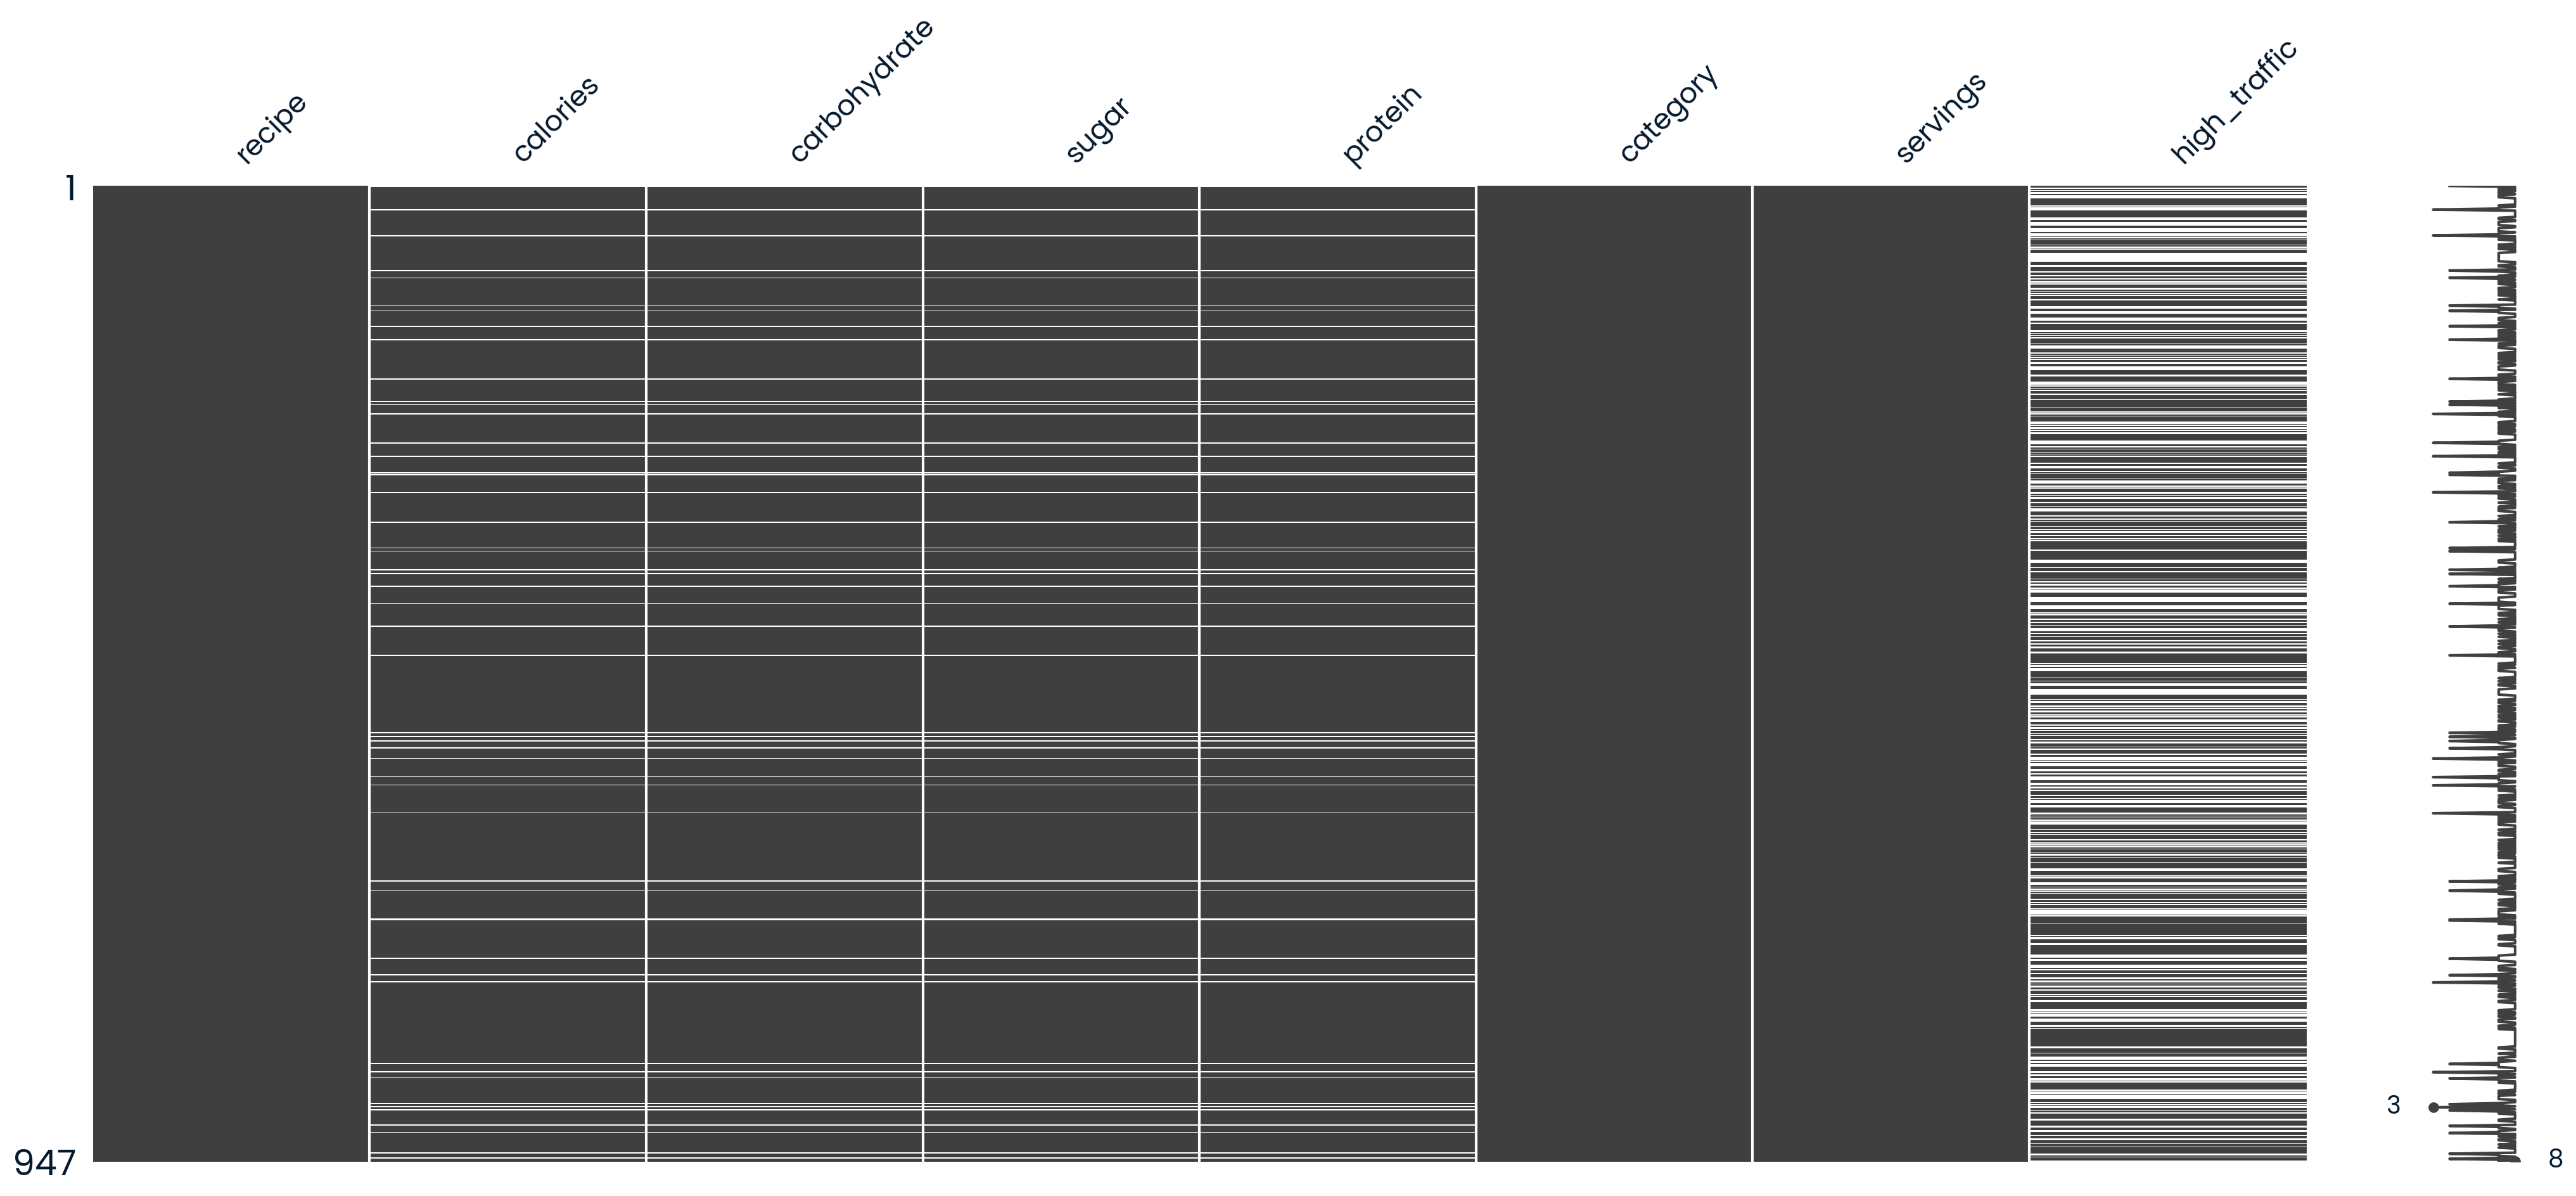

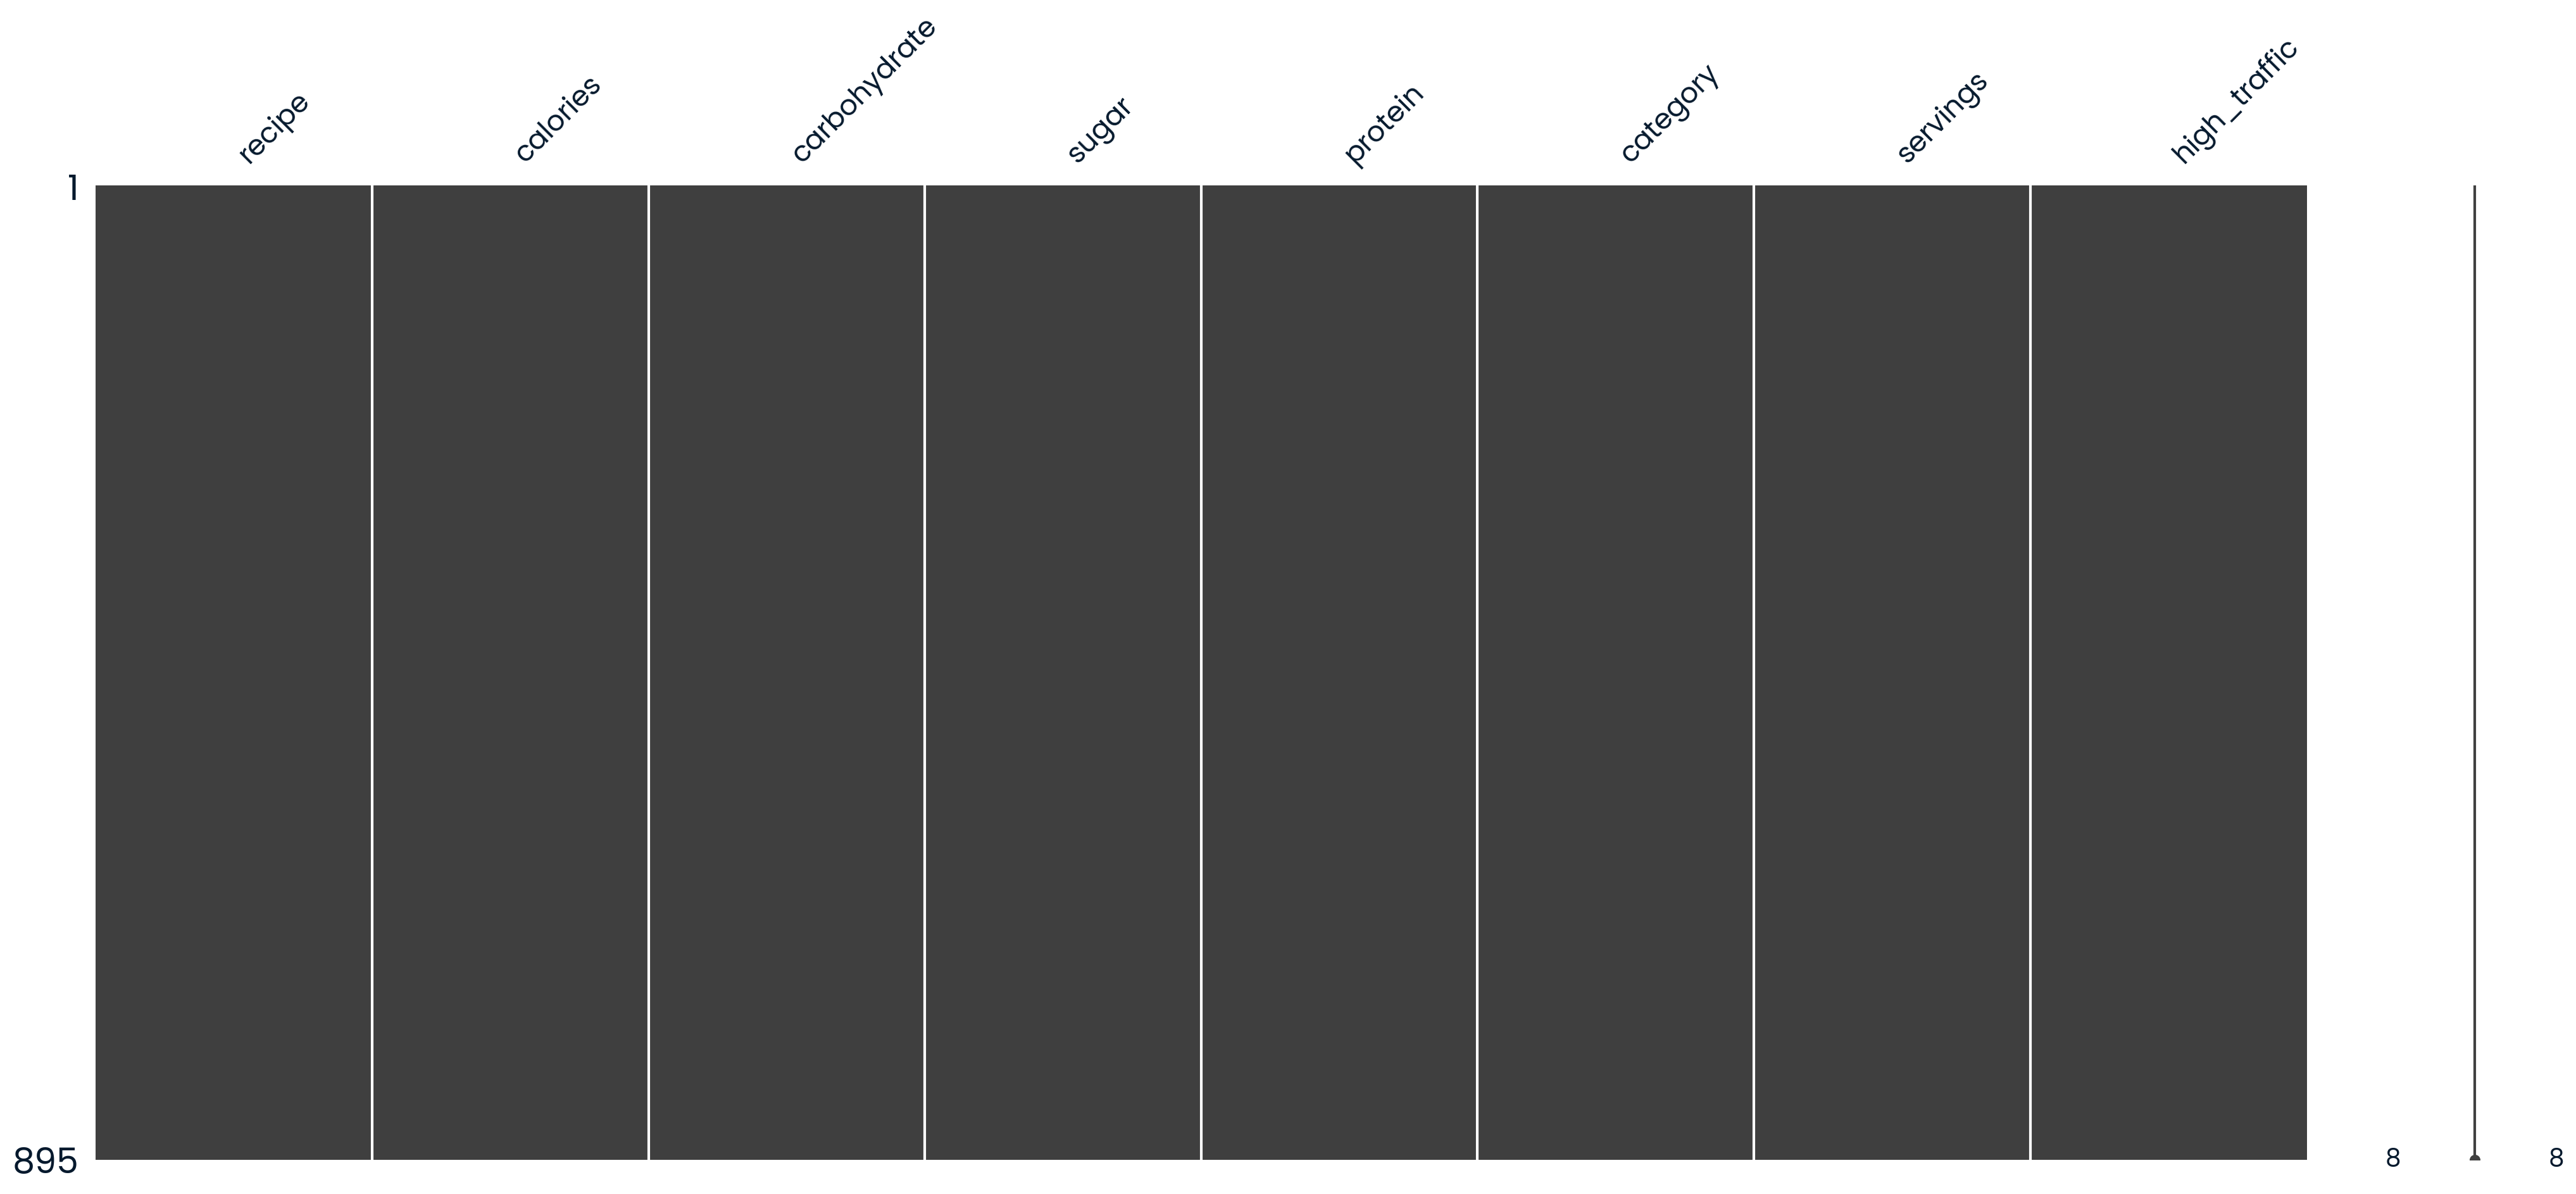

In [163]:
import missingno as msno
msno.matrix(recipe_df)
msno.matrix(clean_recipe_df)


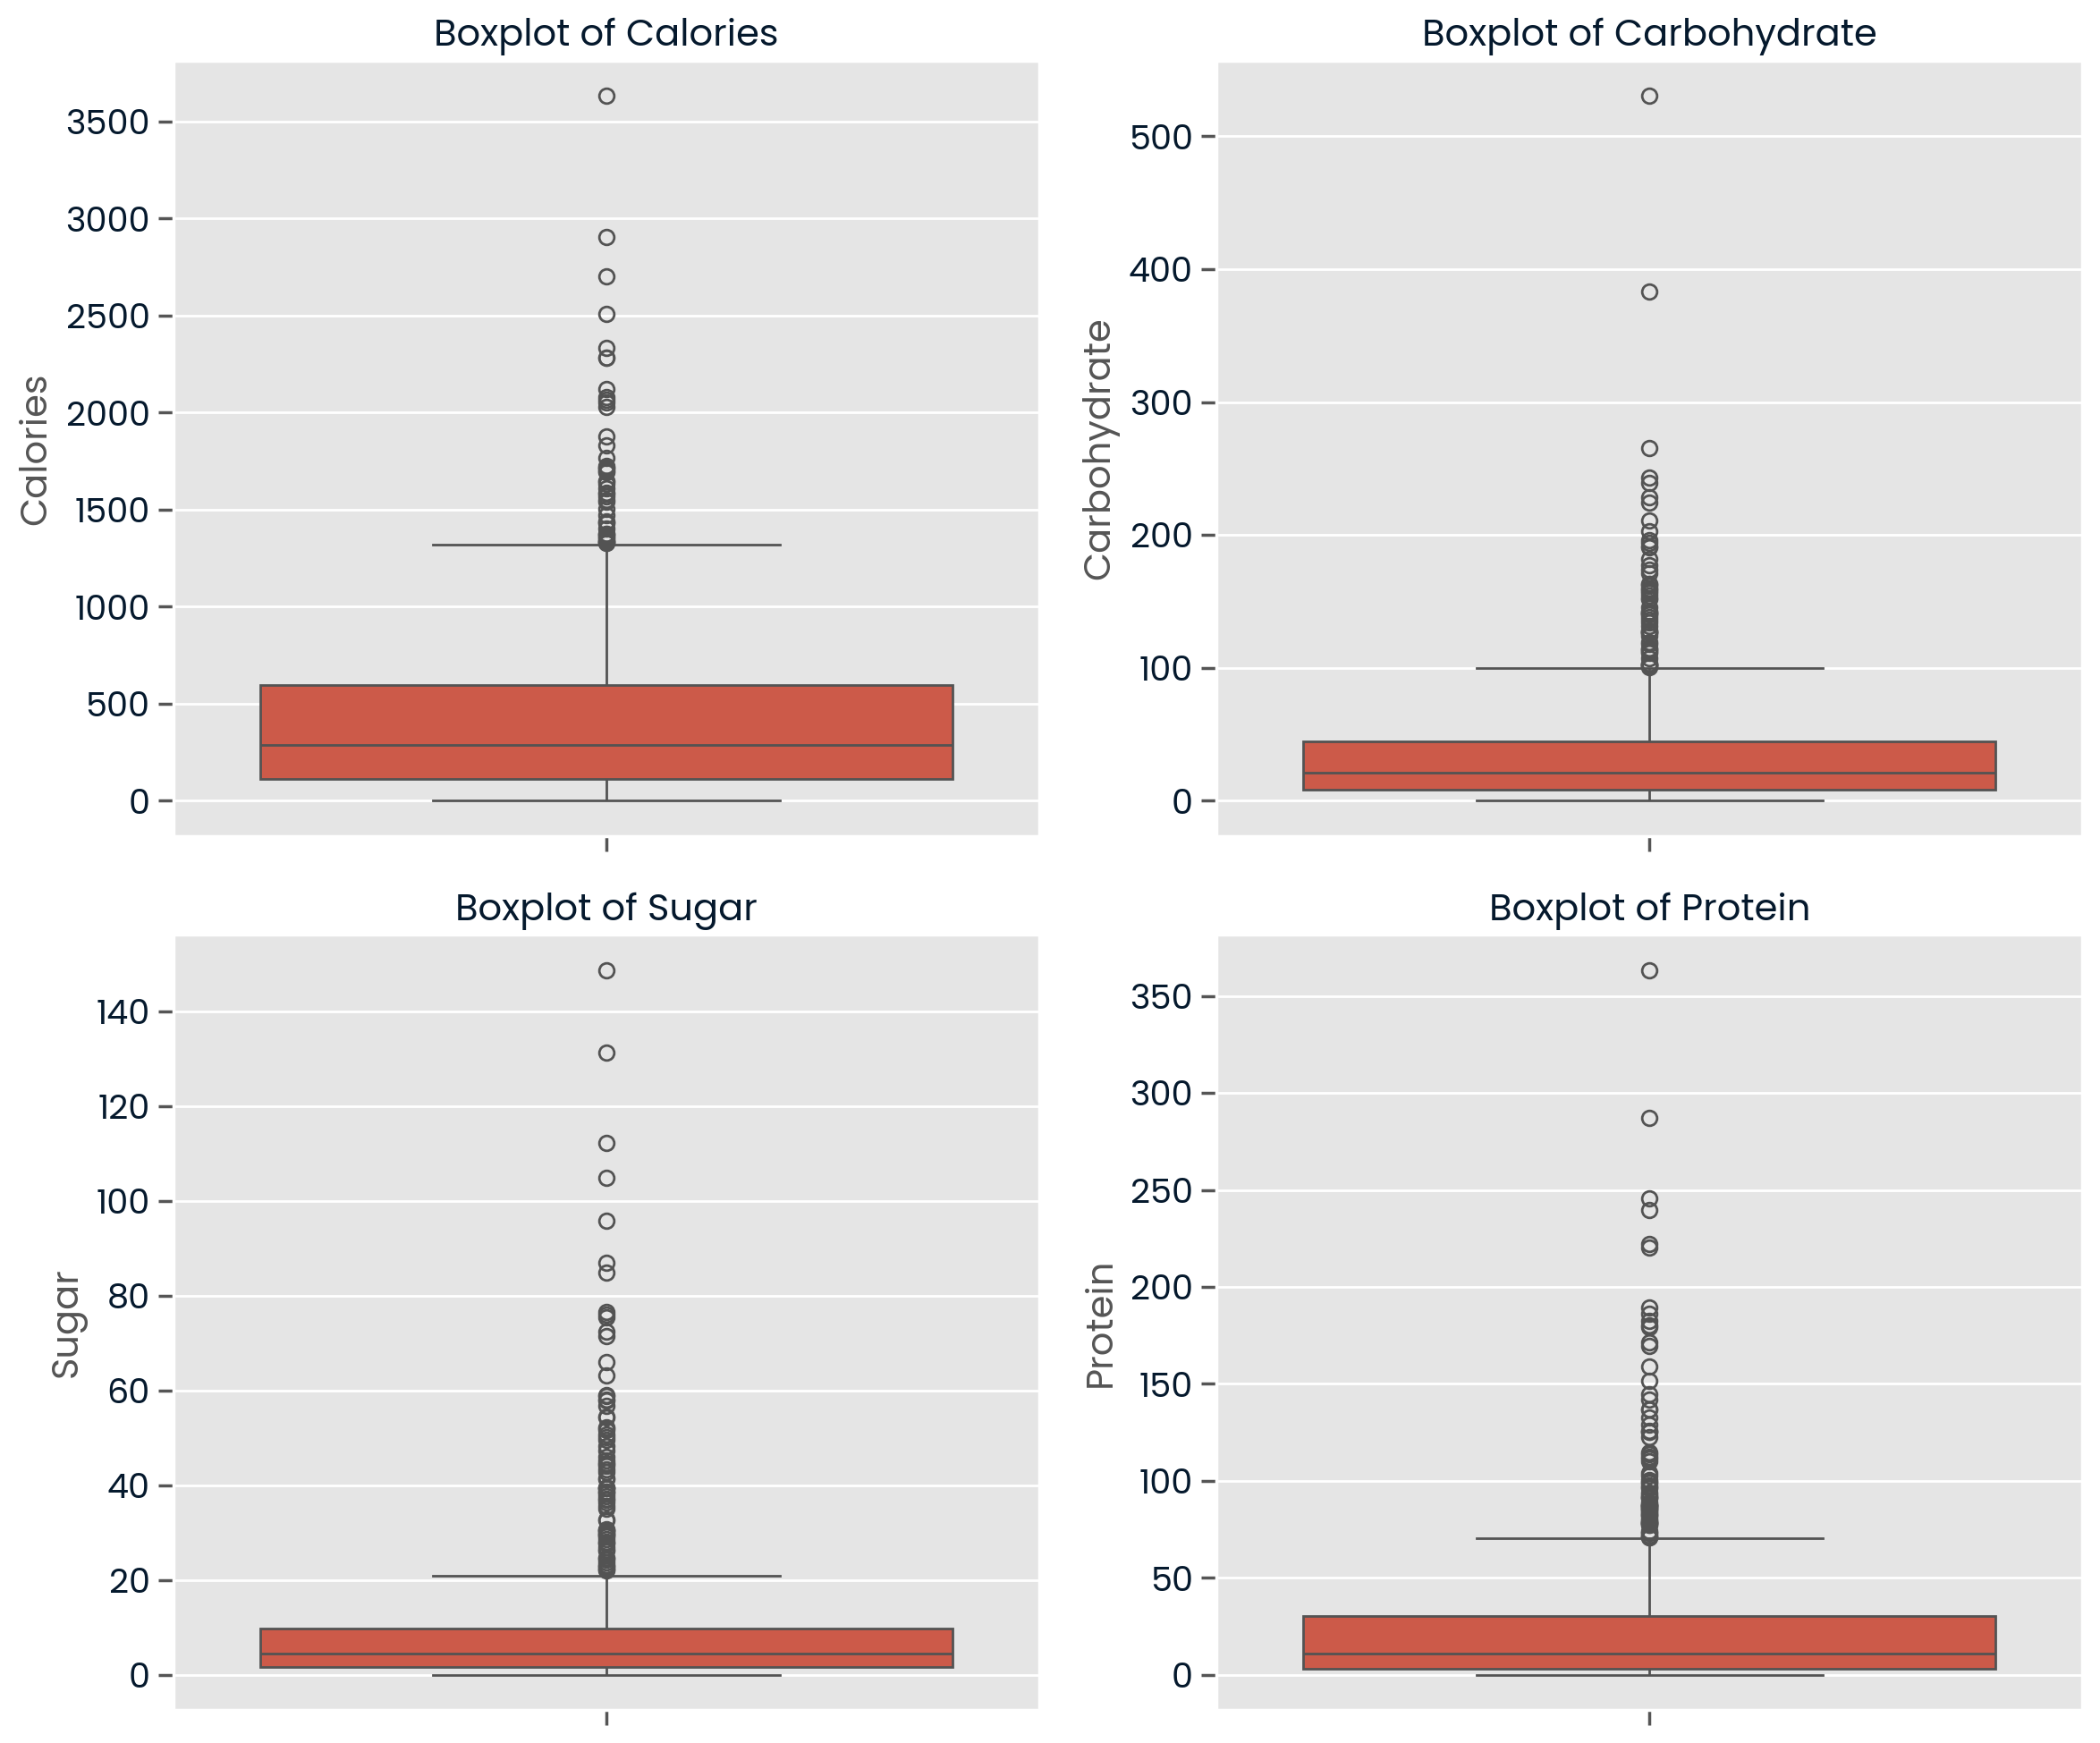

              servings  calories  carbohydrate     sugar   protein
servings      1.000000 -0.034756     -0.017895 -0.008617 -0.017926
calories     -0.034756  1.000000     -0.028970 -0.097302  0.172477
carbohydrate -0.017895 -0.028970      1.000000  0.073922 -0.042795
sugar        -0.008617 -0.097302      0.073922  1.000000 -0.099053
protein      -0.017926  0.172477     -0.042795 -0.099053  1.000000


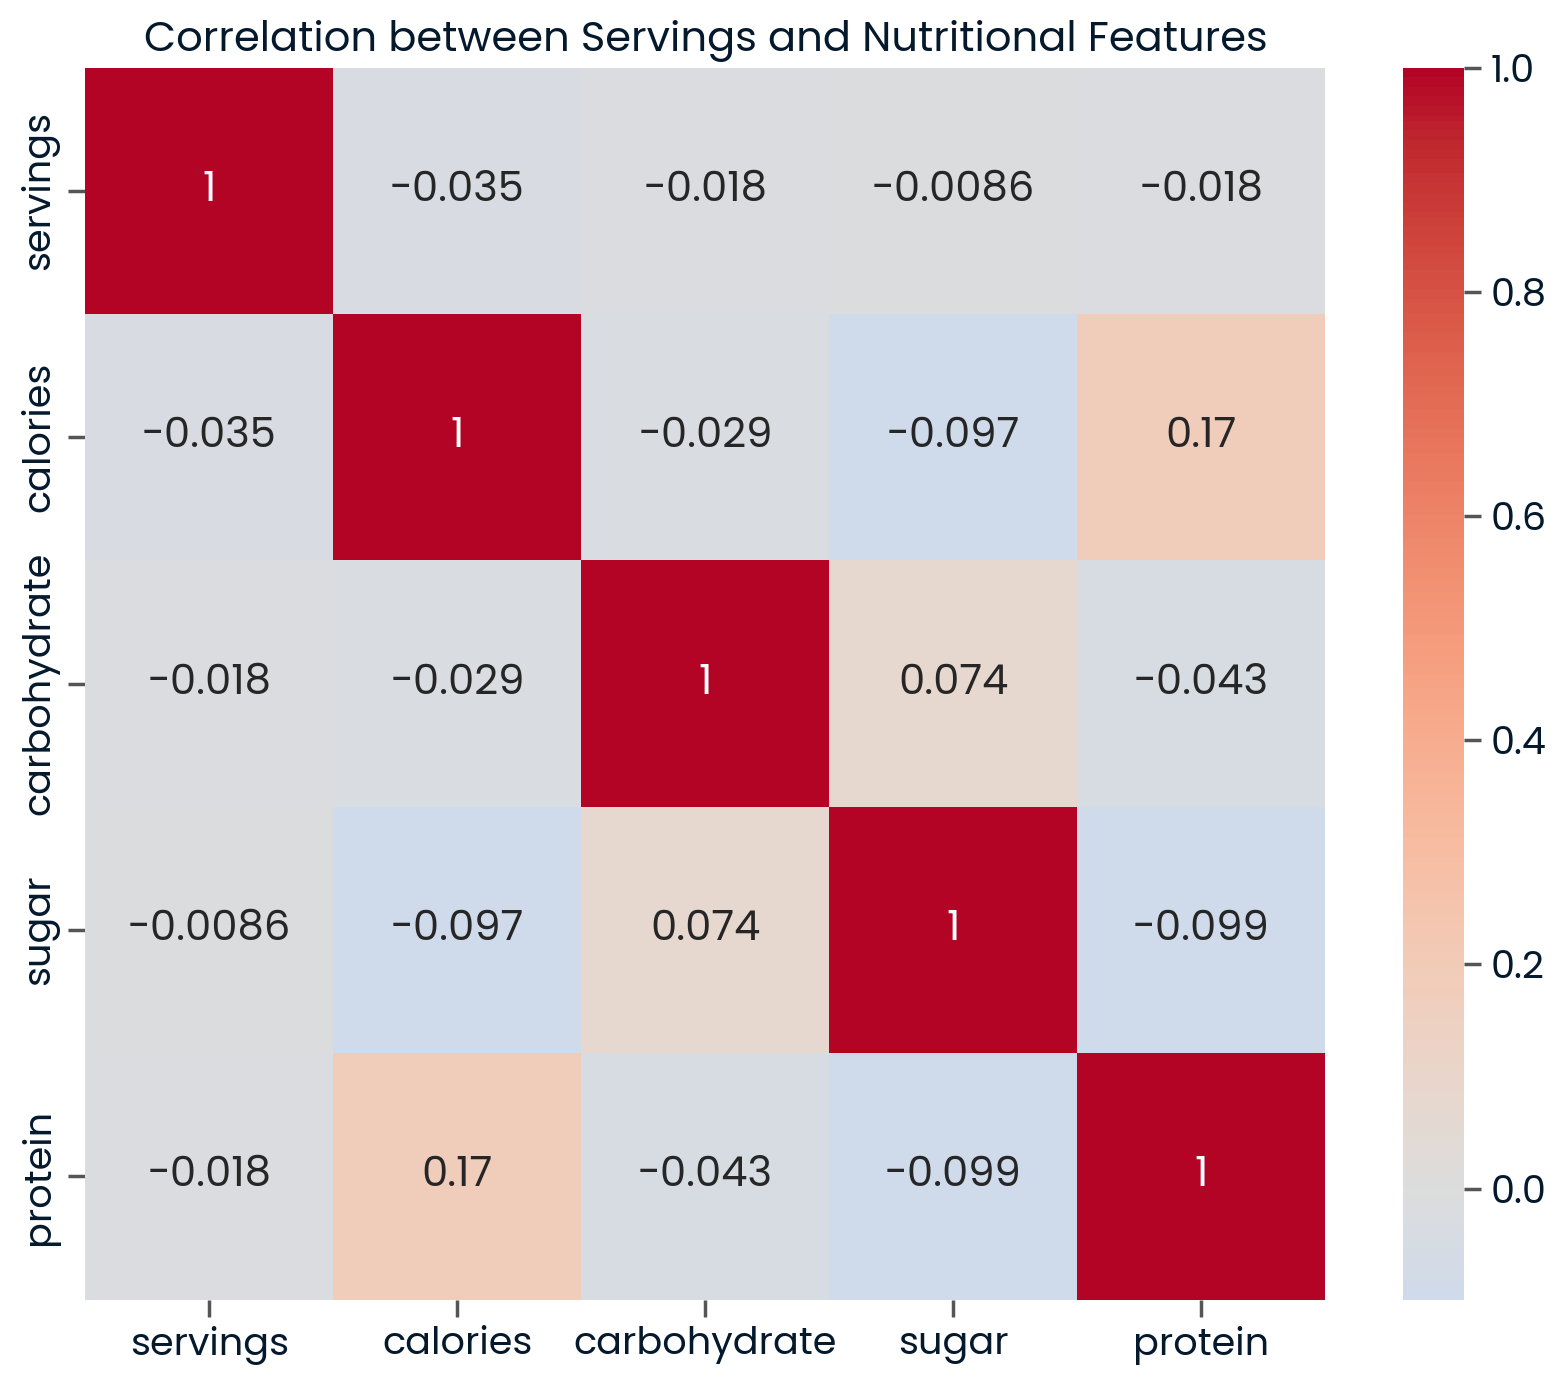

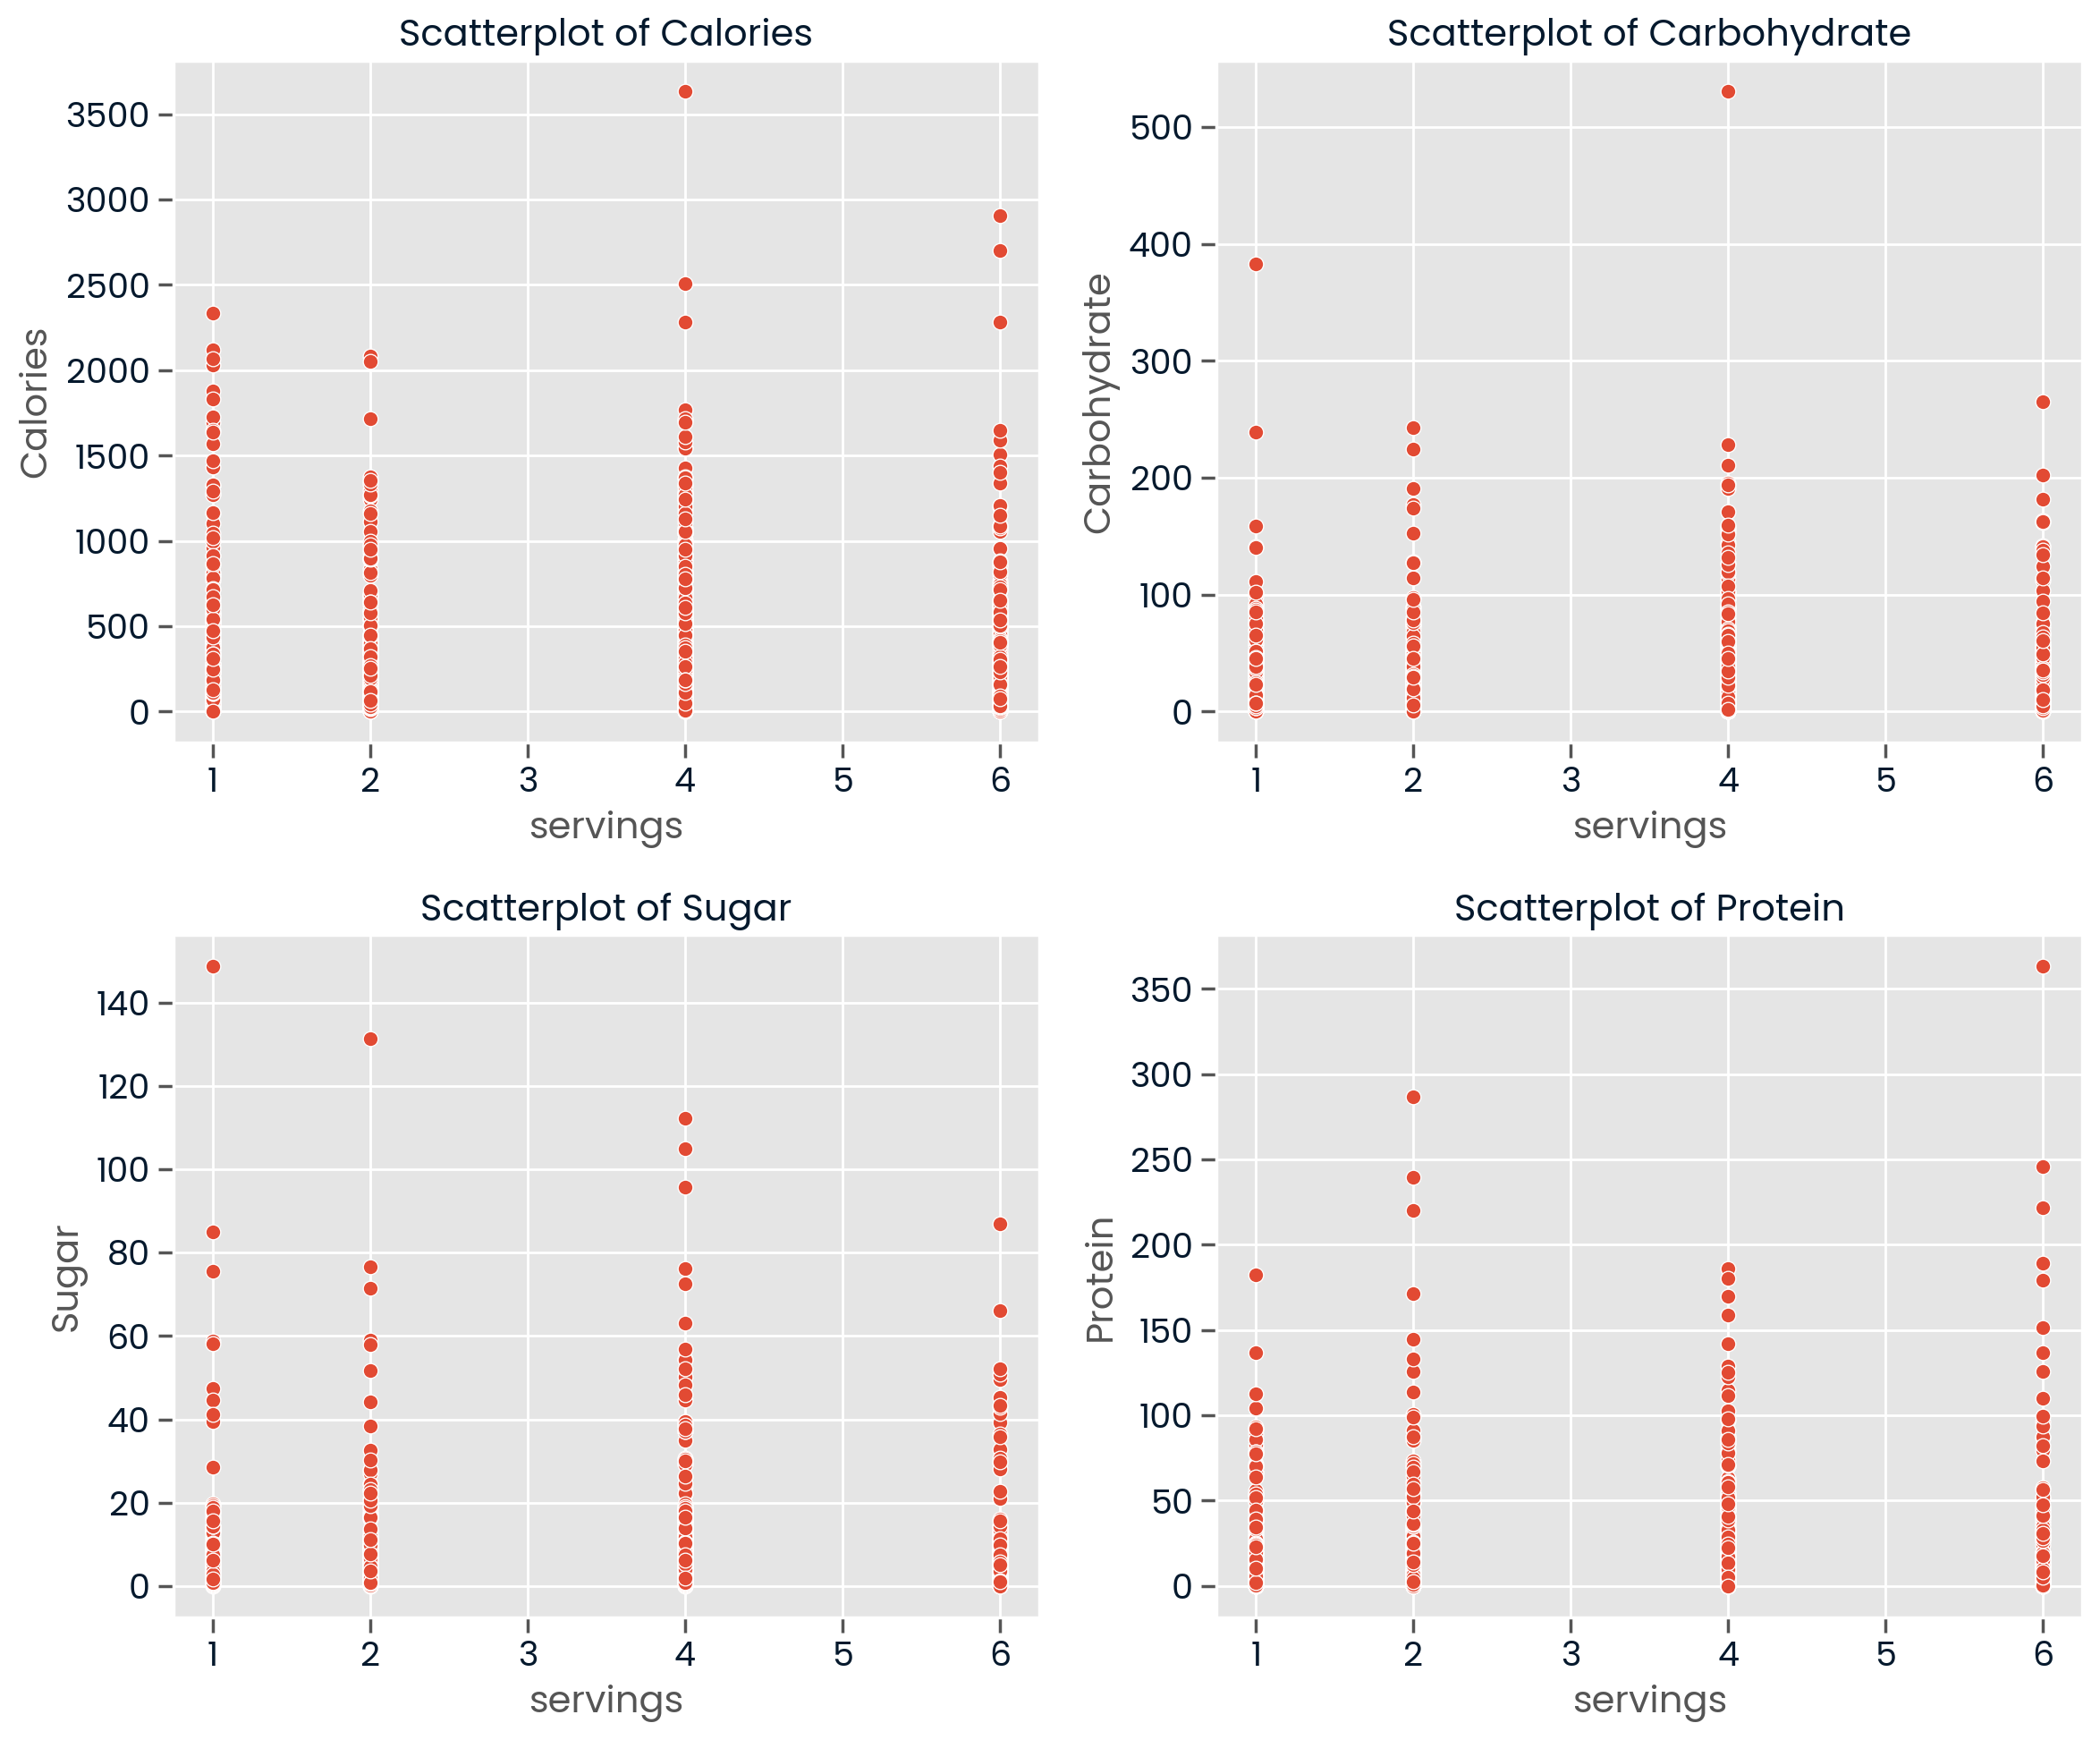

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set_context('notebook', font_scale= 1.25)

nutritional_features = ['calories', 'carbohydrate', 'sugar', 'protein']

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
axes = axes.flatten()  

# Create a boxplot for each nutritional feature
for ax, feature in zip(axes, nutritional_features):
    
    sns.boxplot(y=feature, data=clean_recipe_df, ax=ax, whis = 1.5)
    ax.set_title(f'Boxplot of {feature.capitalize()}')
    ax.set_ylabel(feature.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()

correlation_matrix = clean_recipe_df[['servings', 'calories', 'carbohydrate', 'sugar', 'protein']].corr()
print(correlation_matrix)
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Servings and Nutritional Features')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
axes = axes.flatten() 

for ax, feature in zip(axes, nutritional_features):
    sns.scatterplot(data = clean_recipe_df, x = 'servings', y = feature, ax = ax)
    ax.set_title(f'Scatterplot of {feature.capitalize()}')
    ax.set_ylabel(feature.capitalize())
    
# Adjust layout
plt.tight_layout()
plt.show()

## Exploratory Data Analysis

I have investigated the target variable and features of the recipe dataset, and the relationship between the target variable and features. 

### Feature Variable - Correlation
   
<div align="center">
    <img src="corr_heatmap.png" alt="Figure 8" width="500">
</div>

A quick check using correlation analysis revealed no significant relationship between serving size and nutritional features. This lack of correlation may suggest that the relationship is not linear or no relationship exists. 

<div align="center">
    <img src="nutrional_scatterplot.png" alt="Figure 8" width="850">
</div>

The scatter plots show the relationship between servings and each nutritional feature. From these plots, you can infer that there is no strong relationship between servings and any of the nutritional features, as indicated by the lack of a clear pattern or trend in the data points. This aligns with the weak correlation values calculated earlier.

The dataset exhibits naturally high variability, so careful consideration of the high variance among nutritional features is essential when developing the model to effectively capture the underlying patterns.

### Transforming the features

| Field         | Variance               |
|---------------|---------------------|
| `calories`    | 205228.02           |
| `carbohydrate`| 1931.52             |
| `sugar`       | 215.48              |
| `protein`     | 1322.76             |
| `servings`    | 3.01                |

After the analysis,I decided to apply the following changes to reduce the varaince of the data and to enable modeling:

- Dummy variables for the categorical variable
- Log transformation for nutritional features
- `StandardScaler` transformation after the log transformation
- `MinMaxScaler` transformation for the `servings` column

Dummy variables were created using `pd.get_dummies` to convert categorical data into binary as the model does not work with categorical type data. `LabelEncoder` was not used as `category` is not a ordinal variable.

<div align="center">
    <img src="Original_Dist.png" alt="Figure 8" width="850">
</div>

For the original dataset, the nutritional features are heavily right skewed. The data has to be transformed as the current data has high variance in certain columns and models using linear space will not be optimal on this dataset. The model is optimal when working with normally distributed data. The log-scale reduces the skewness, then the `StandardScaler` will be applied to normalise the distribution to have a mean of 0 and variance of 1. The `StandardScaler` is used when the the data is close to being normally distributed, which is true for the nutritional features after the log transformation. It is also useful when the data contains outliers that you want to retian in natural distribution.

<div align="center">
    <img src="Transformed_Dist.png" alt="Figure 8" width="850">
</div>

For the `servings` column `MinMaxScaler` was used instead of `StandardScaler` as the `servings` column data is not normally distributed. The `MinMaxScaler` scales the feature into a min of 0 and maximum of 1.

<div align="center">
    <img src="MinMaxScaler.png" alt="Figure 8" width="500">
</div>

### Feature Variable - Correlation with Target Variable

#### `servings`

<div align="center">
    <img src="traffic_by_servings_with_ratio.png" alt="Figure 8" width="850">
</div>

The ratio of high traffic to low traffic, when analysed with respect to the servings variable, offers insight into how the number of servings influences the likelihood of high traffic. The graph reveals a positive correlation between servings and the ratio of high traffic, indicating that larger serving sizes tend to have a higher chance of being associated with high traffic. This suggests that recipes with higher servings are more likely to attract higher traffic, while smaller serving sizes are less likely to generate high traffic. Therefore, it appears that the size of servings plays an important role in determining the success or popularity of a recipe in terms of traffic, and is a useful feature for the model.

#### `category` - Categorical Variable

<div align="center">
    <img src="traffic_by_category_with_percentages.png" alt="Figure 8" width="850">
</div>

The data reveals a clear relationship between the recipe category and the likelihood of high traffic. Categories like `Vegetable`, `Potato`, and `Pork` have very high percentages of `high-traffic` recipes, with values exceeding 90%, suggesting that these types of recipes tend to attract a lot of attention and are more likely to generate high traffic. In contrast, `Beverages` has a low percentage of 5% implying that these recipes are likely not to cause high traffic. The differences in these percentages imply that certain categories, possibly due to their ingredients, tend to perform better in terms of traffic. These extreme categories can be used as very good features to predict which recipes are likely to cause high traffic on the website. By focusing on these categories, the model will benefit from fewer dimensions.

#### Nutritional Features

<div align="center">
    <img src="Boxplots-Transformed_NF_grouped_by_high_traffic.png" width="850">
</div>

The boxplots of the nutritional features before transformation show that these features are not good indicators of whether the recipe leads to high traffic, as many of the metrics like median, IQR, and range are very similar between the high_traffic and low_traffic data. There are some predictions you can make using these features like a higher carbohydrate value could imply an increased probability to be high_traffic as the max and median are higher compared to low_traffic data.

### Feature Engineering - New variables

After the initial modelling, it was observed that the nutritional features—except for protein—had low variance explained. As a result, new features for carbohydrates, sugar, and calories were created by transforming them to represent values per serving.

<div align="center">
    <img src="Boxplots-Transformed_NF_per_serving_grouped_by_high_traffic.png" width="850">
</div>

Although the boxplots do not show significant improvement after the transformation, running the model with this newly transformed data may yield different, possibly better results.

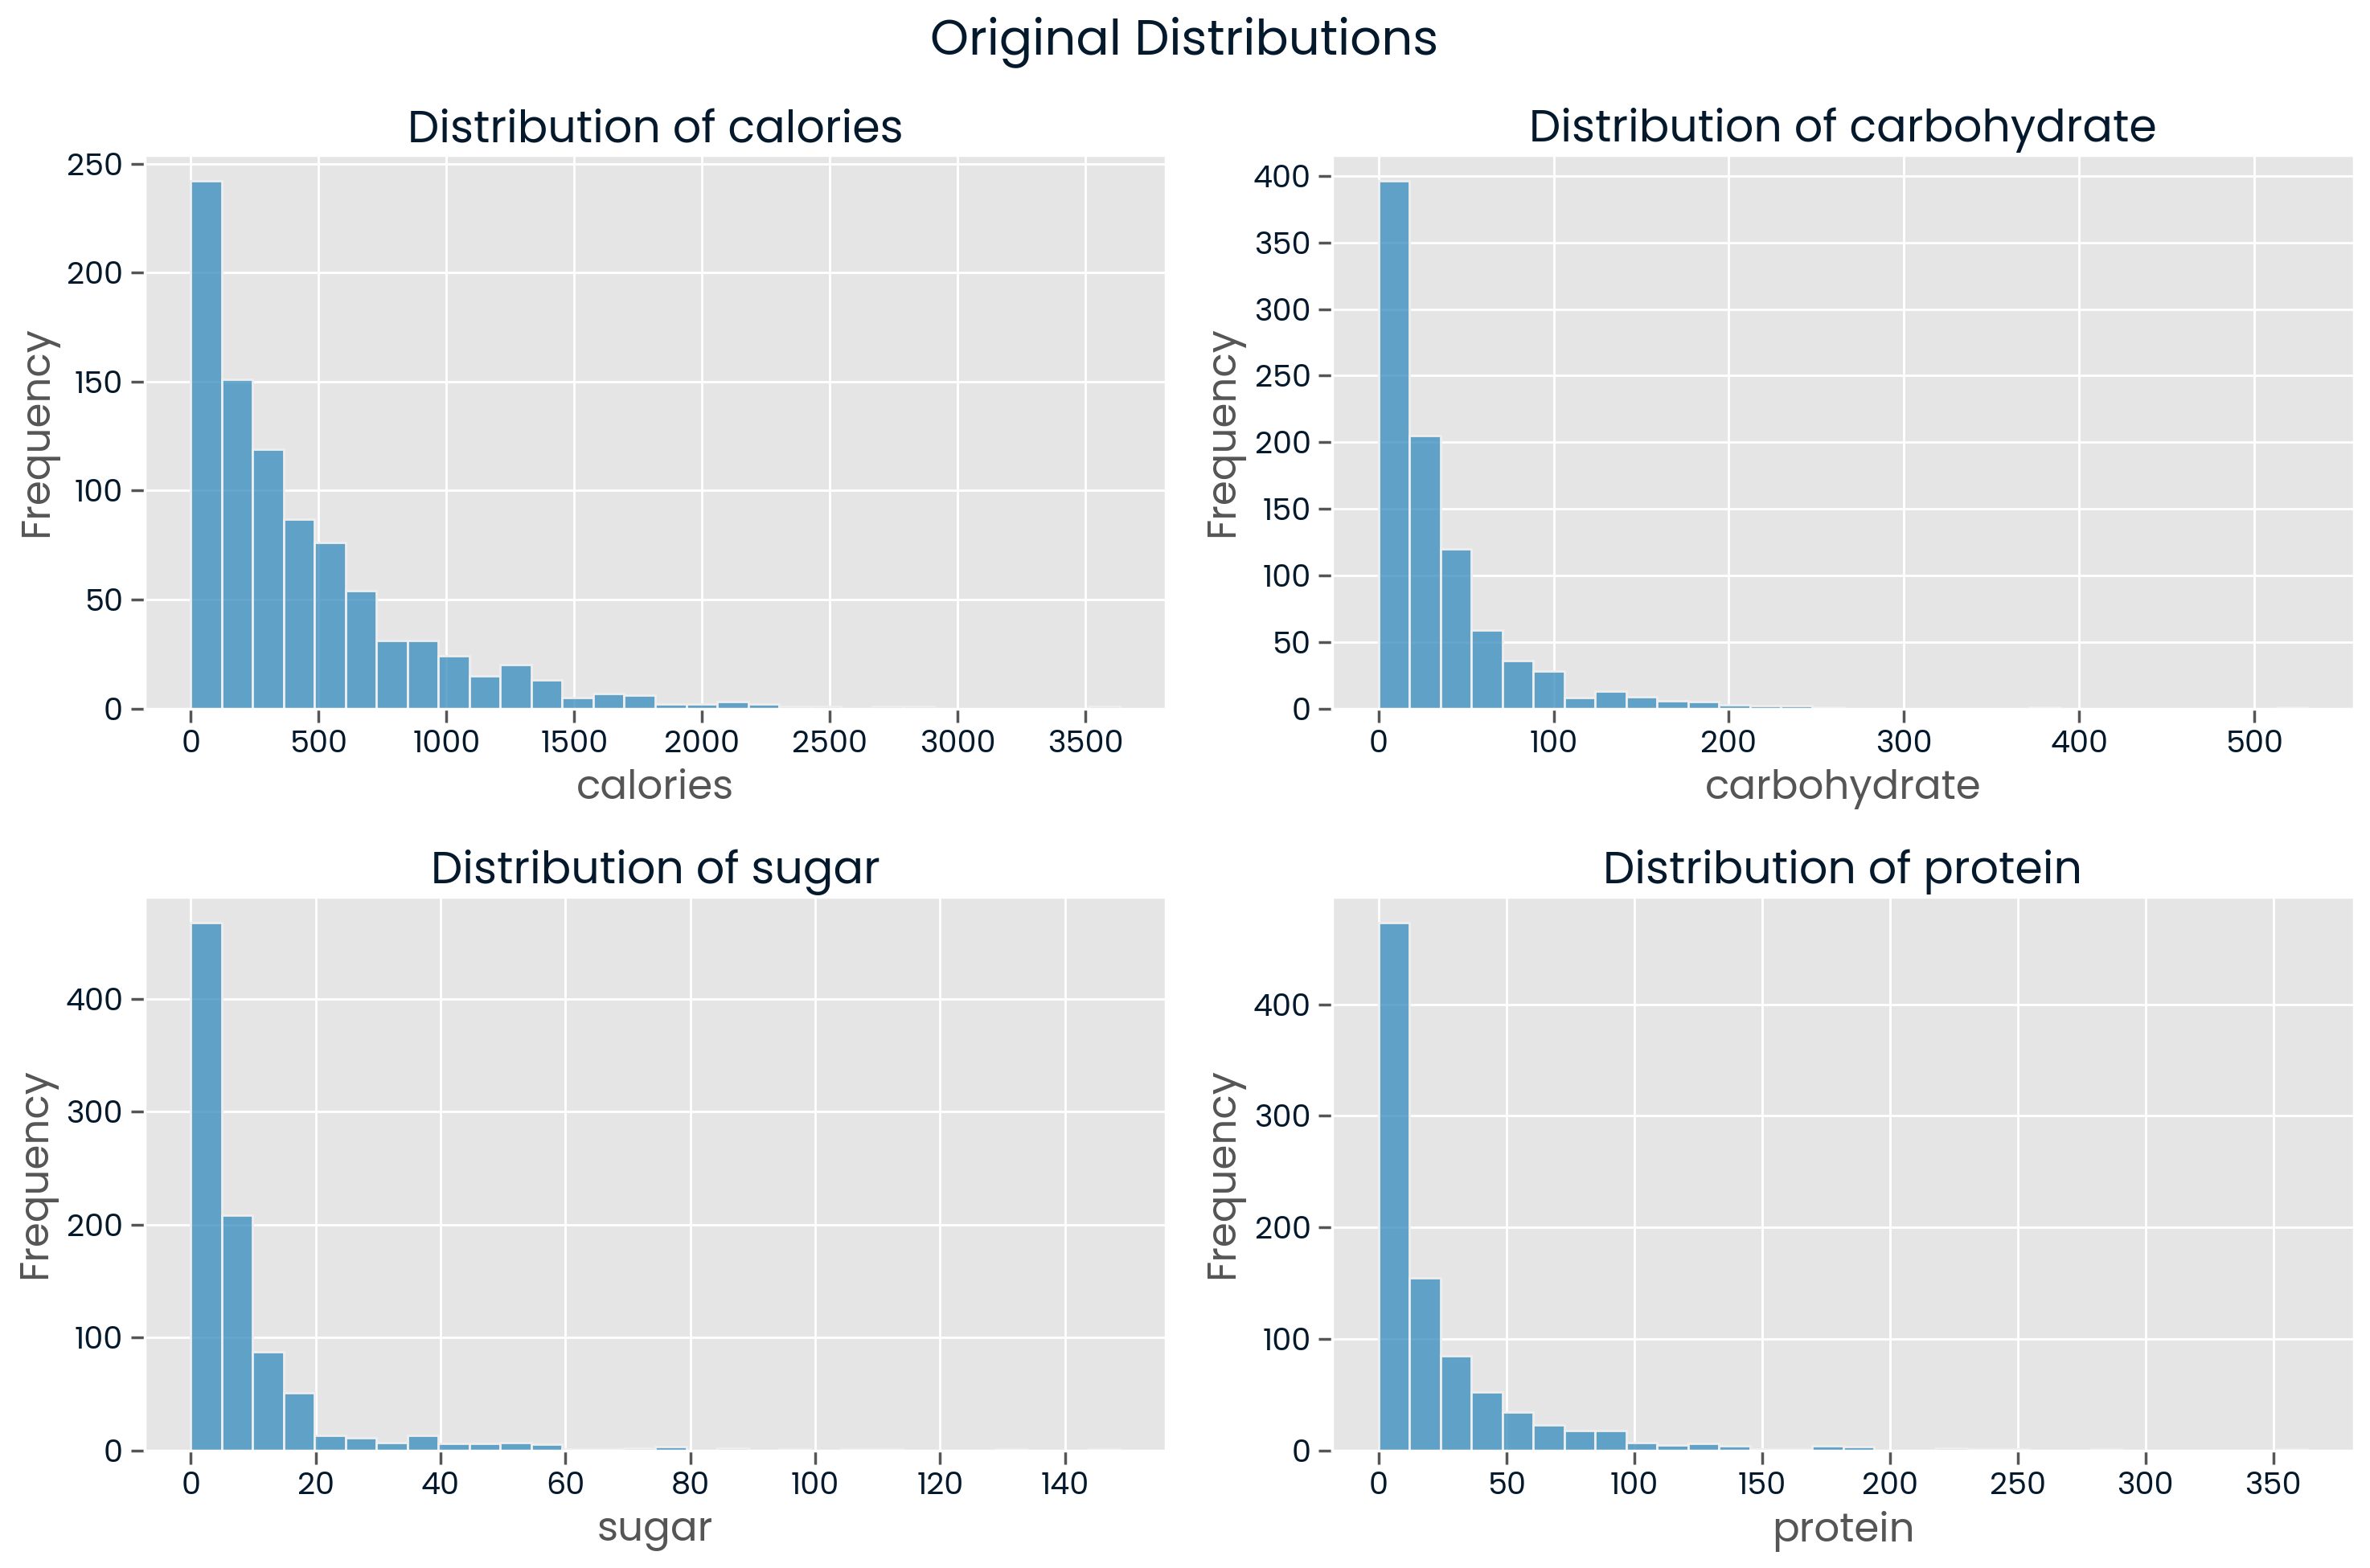

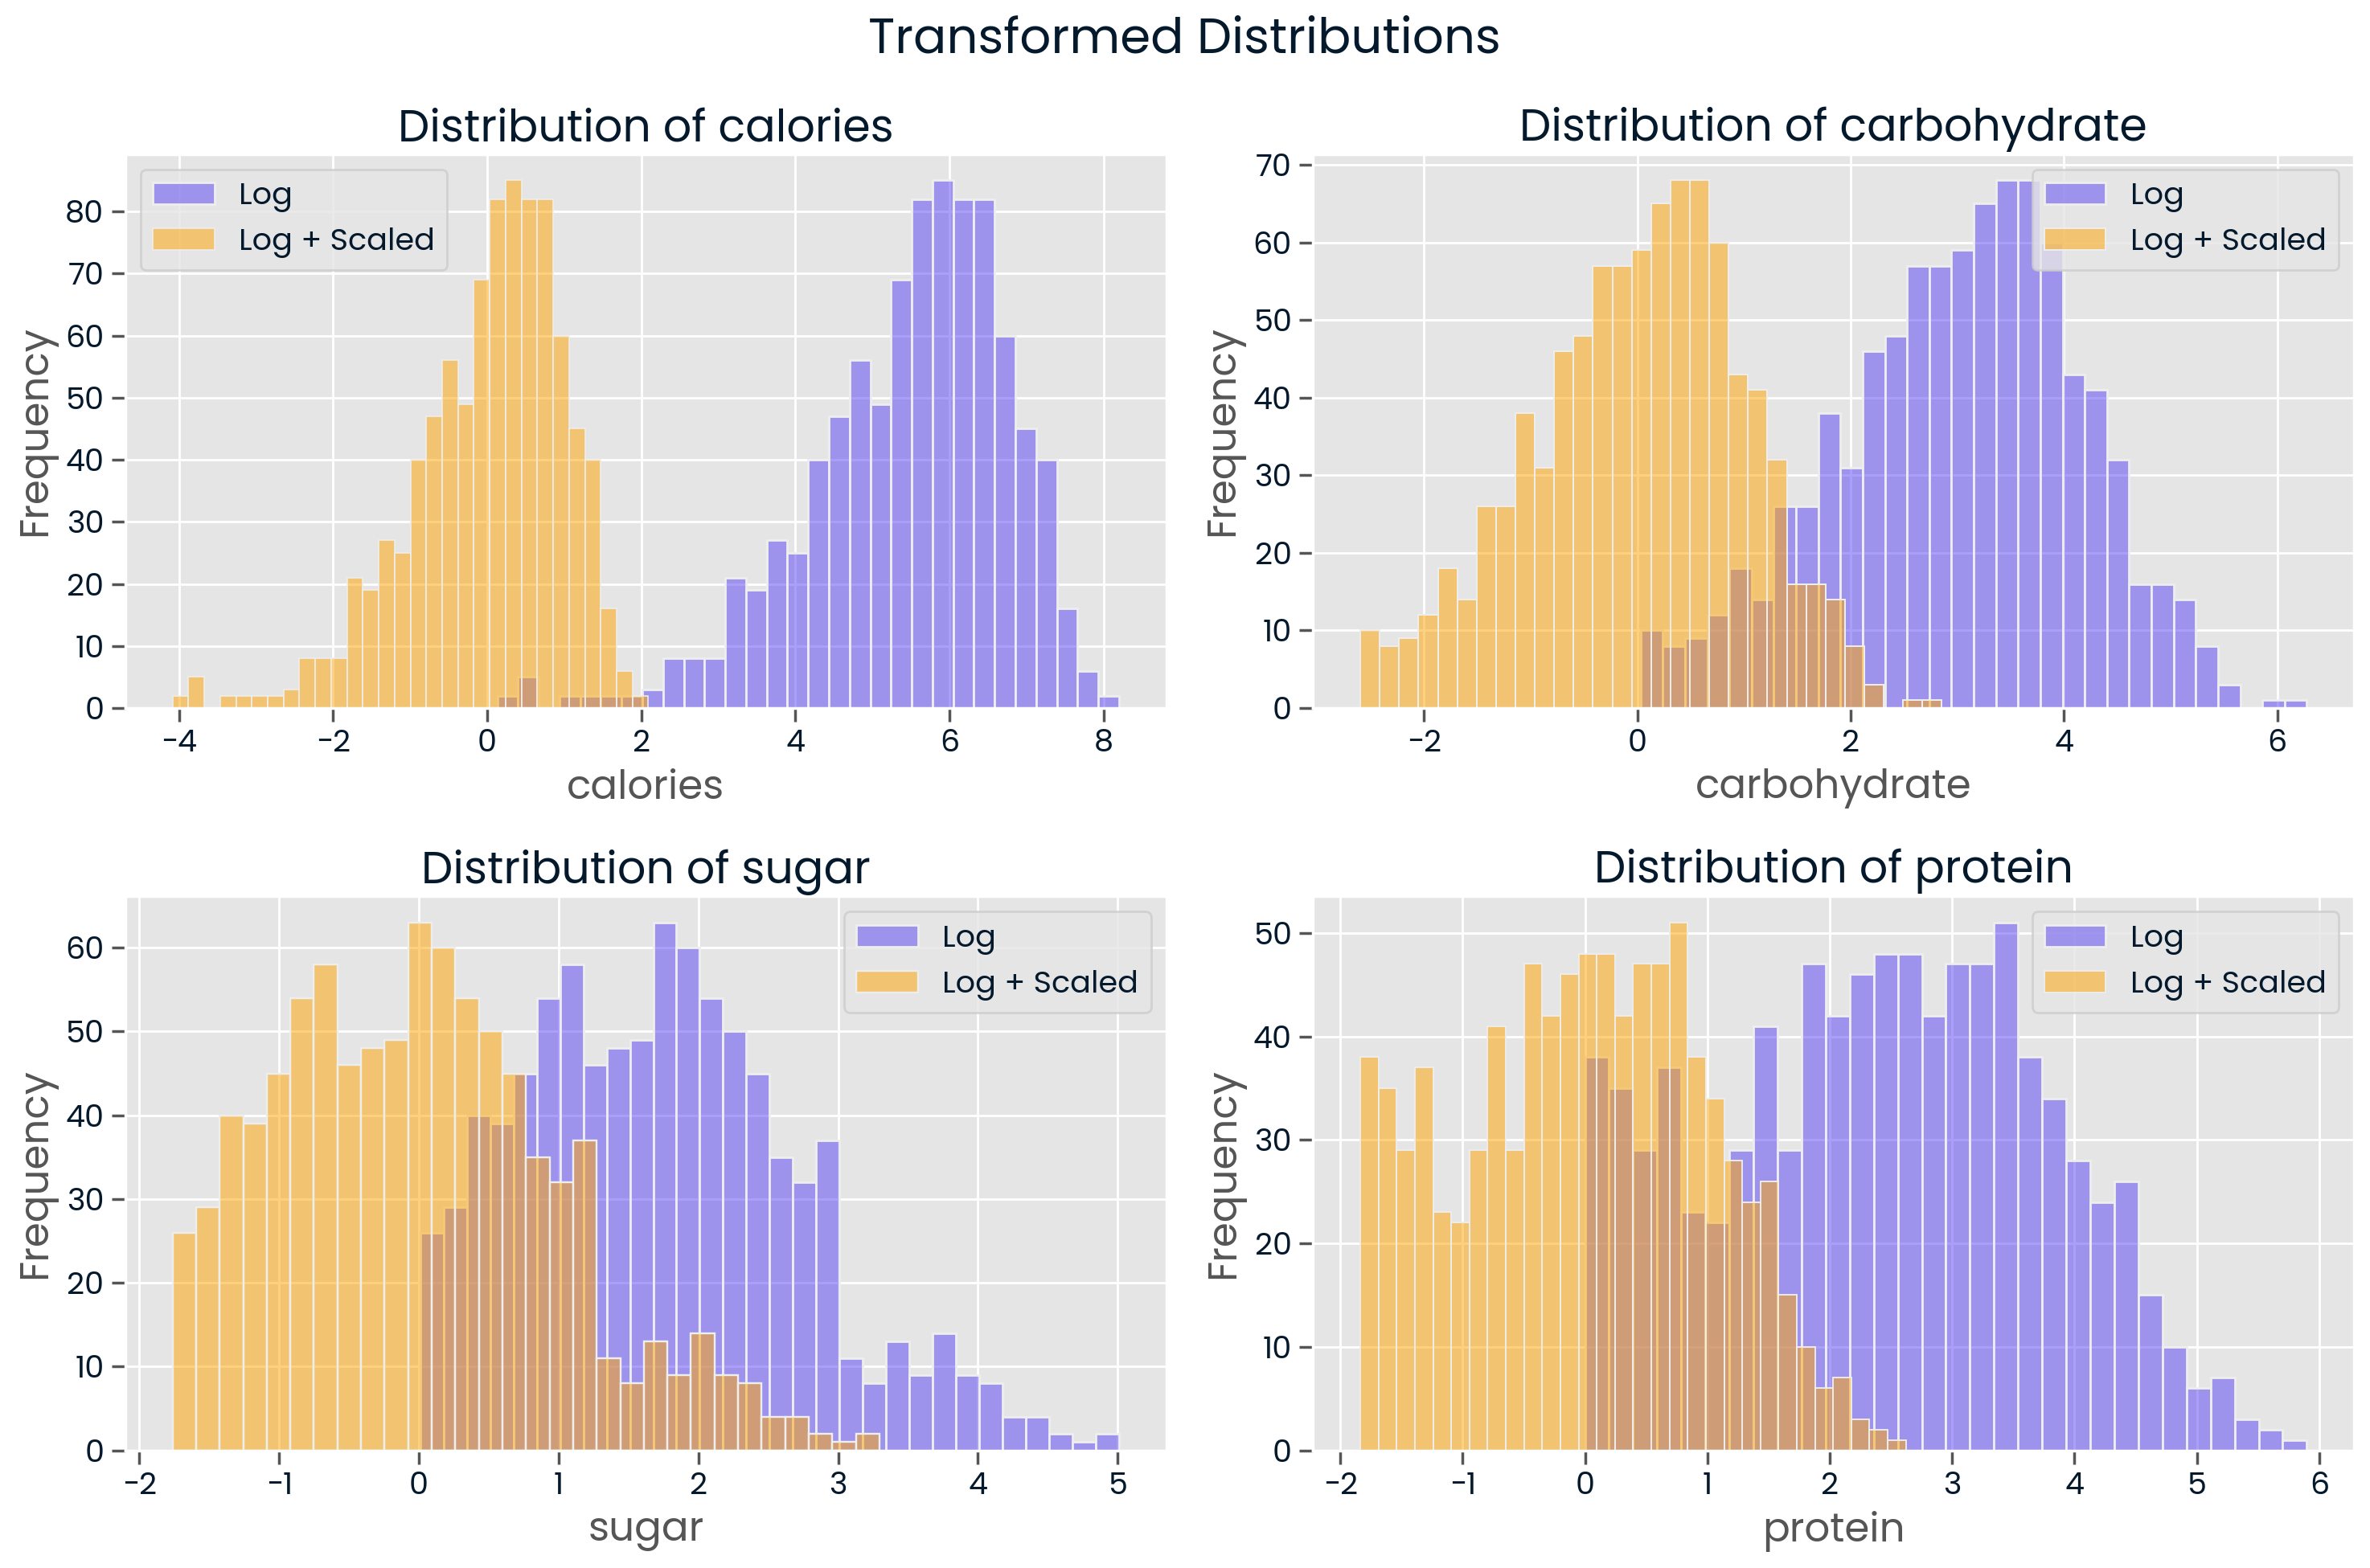

In [165]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
mm_scaler = MinMaxScaler()

def transform_data(df, scaler, min_max_scaler, test=False):
    """
    Transform the input DataFrame by applying log transformations, 
    dummy categorical variables, and scaling to specific features.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data to transform.
    test (bool): A flag indicating whether the DataFrame is for testing 
                 (True) or training (False). If True, uses 
                 `transform()` instead of `fit_transform()` to avoid 
                 data leakage.

    Returns:
    pd.DataFrame: The transformed DataFrame with log-transformed 
                  nutritional features, dummy categorical 
                  features, and scaled values for servings.
    """ 
    #Avoids DataLeakage using test

    # Log transform
    for feature in nutritional_features:
        if feature in df.columns:  
            df[feature] = np.log1p(df[feature])
    
    available_nutritional_features = [feature for feature in nutritional_features if feature in df.columns]
    
    # Scales Data
    if test == False:
        if available_nutritional_features:  
            df[available_nutritional_features] = scaler.fit_transform(df[available_nutritional_features])
        if 'servings' in df.columns:
            df['servings'] = mm_scaler.fit_transform(df[['servings']])
    elif test == True:
        if available_nutritional_features:  
            df[available_nutritional_features] = scaler.transform(df[available_nutritional_features])
        if 'servings' in df.columns:
            df['servings'] = mm_scaler.transform(df[['servings']])
    return df

df_transformed = clean_recipe_df.copy()

df_transformed_log = clean_recipe_df.copy()
for feature in nutritional_features:
    # Handles values that are 0
    df_transformed_log[feature] = np.log1p(df_transformed_log[feature])
    
df_transformed = transform_data(df_transformed, scaler, mm_scaler, False)

# Graph original distributions

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Original Distributions', fontsize=22)
axes = axes.flatten()

for ax, feature in zip(axes, nutritional_features):
    sns.histplot(data=clean_recipe_df, x=feature, ax=ax, bins=30, color='C1') 
    ax.set_title(f'Distribution of {feature}', fontsize = 20)
    ax.set_xlabel(feature, fontsize=18)  # X-axis label font size
    ax.set_ylabel('Frequency', fontsize=18)  # Y-axis label font size
plt.tight_layout()
plt.show()

# Graph log + log+scaled on same histplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Transformed Distributions', fontsize=22)
axes = axes.flatten()

for ax, feature in zip(axes, nutritional_features):
    sns.histplot(data=df_transformed_log, x=feature, ax=ax, bins=30, color='#5742f5', alpha=0.5, label = 'Log')
    sns.histplot(data=df_transformed, x=feature, ax=ax, bins=30, color='orange', label='Log + Scaled', alpha=0.5)
    ax.set_title(f'Distribution of {feature}', fontsize = 20)
    ax.set_xlabel(feature, fontsize=18) 
    ax.set_ylabel('Frequency', fontsize=18) 
    ax.legend()
plt.tight_layout()
plt.show()

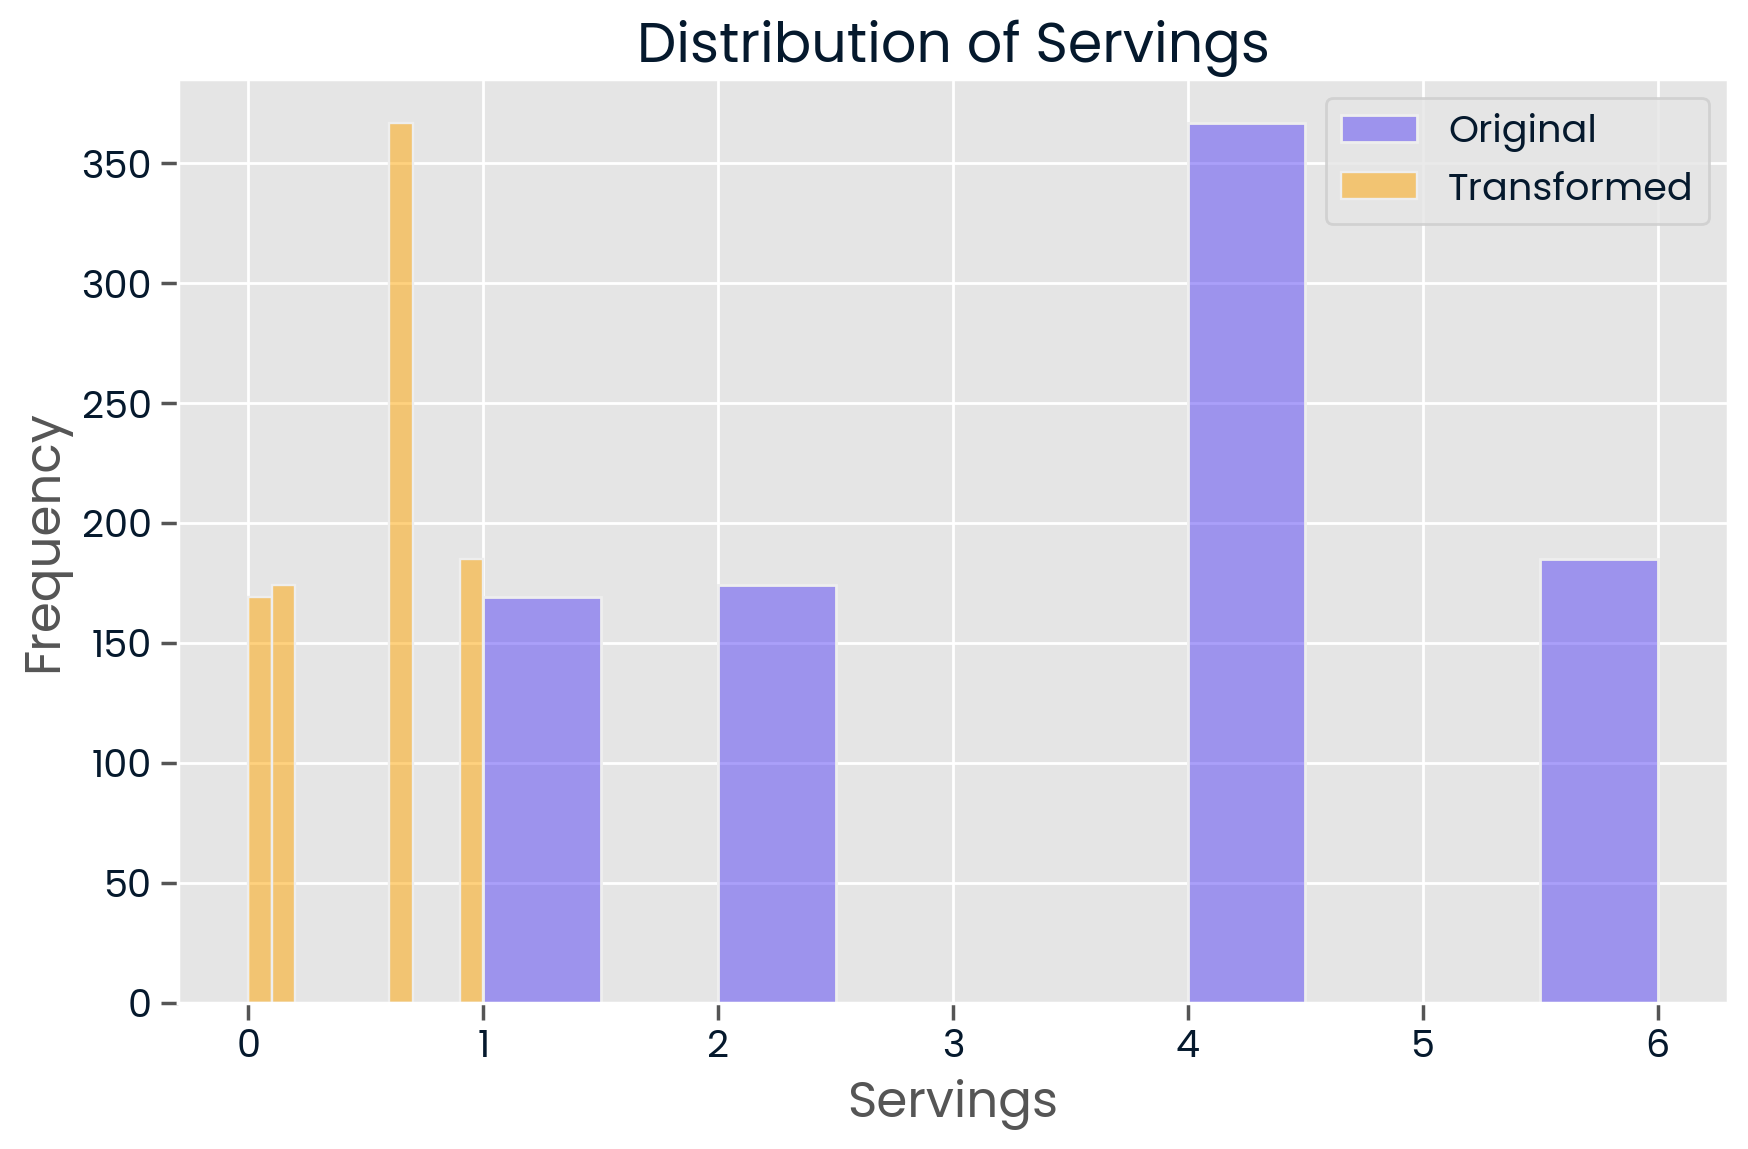

In [166]:
fig, ax = plt.subplots(figsize=(10, 6))  

sns.histplot(data=clean_recipe_df, x='servings', bins=10, color='#5742f5', alpha=0.5, label='Original', ax=ax)
sns.histplot(data=df_transformed, x='servings', bins=10, color='orange', label='Transformed', alpha=0.5, ax=ax)

ax.set_title('Distribution of Servings', fontsize=20)
ax.set_xlabel('Servings', fontsize=18) 
ax.set_ylabel('Frequency', fontsize=18) 
ax.legend()
plt.savefig('MinMaxScaler.png', dpi=300, bbox_inches='tight')
plt.show()

high_traffic  False  True 
servings                  
1                70     99
2                76     98
4               147    220
6                67    118


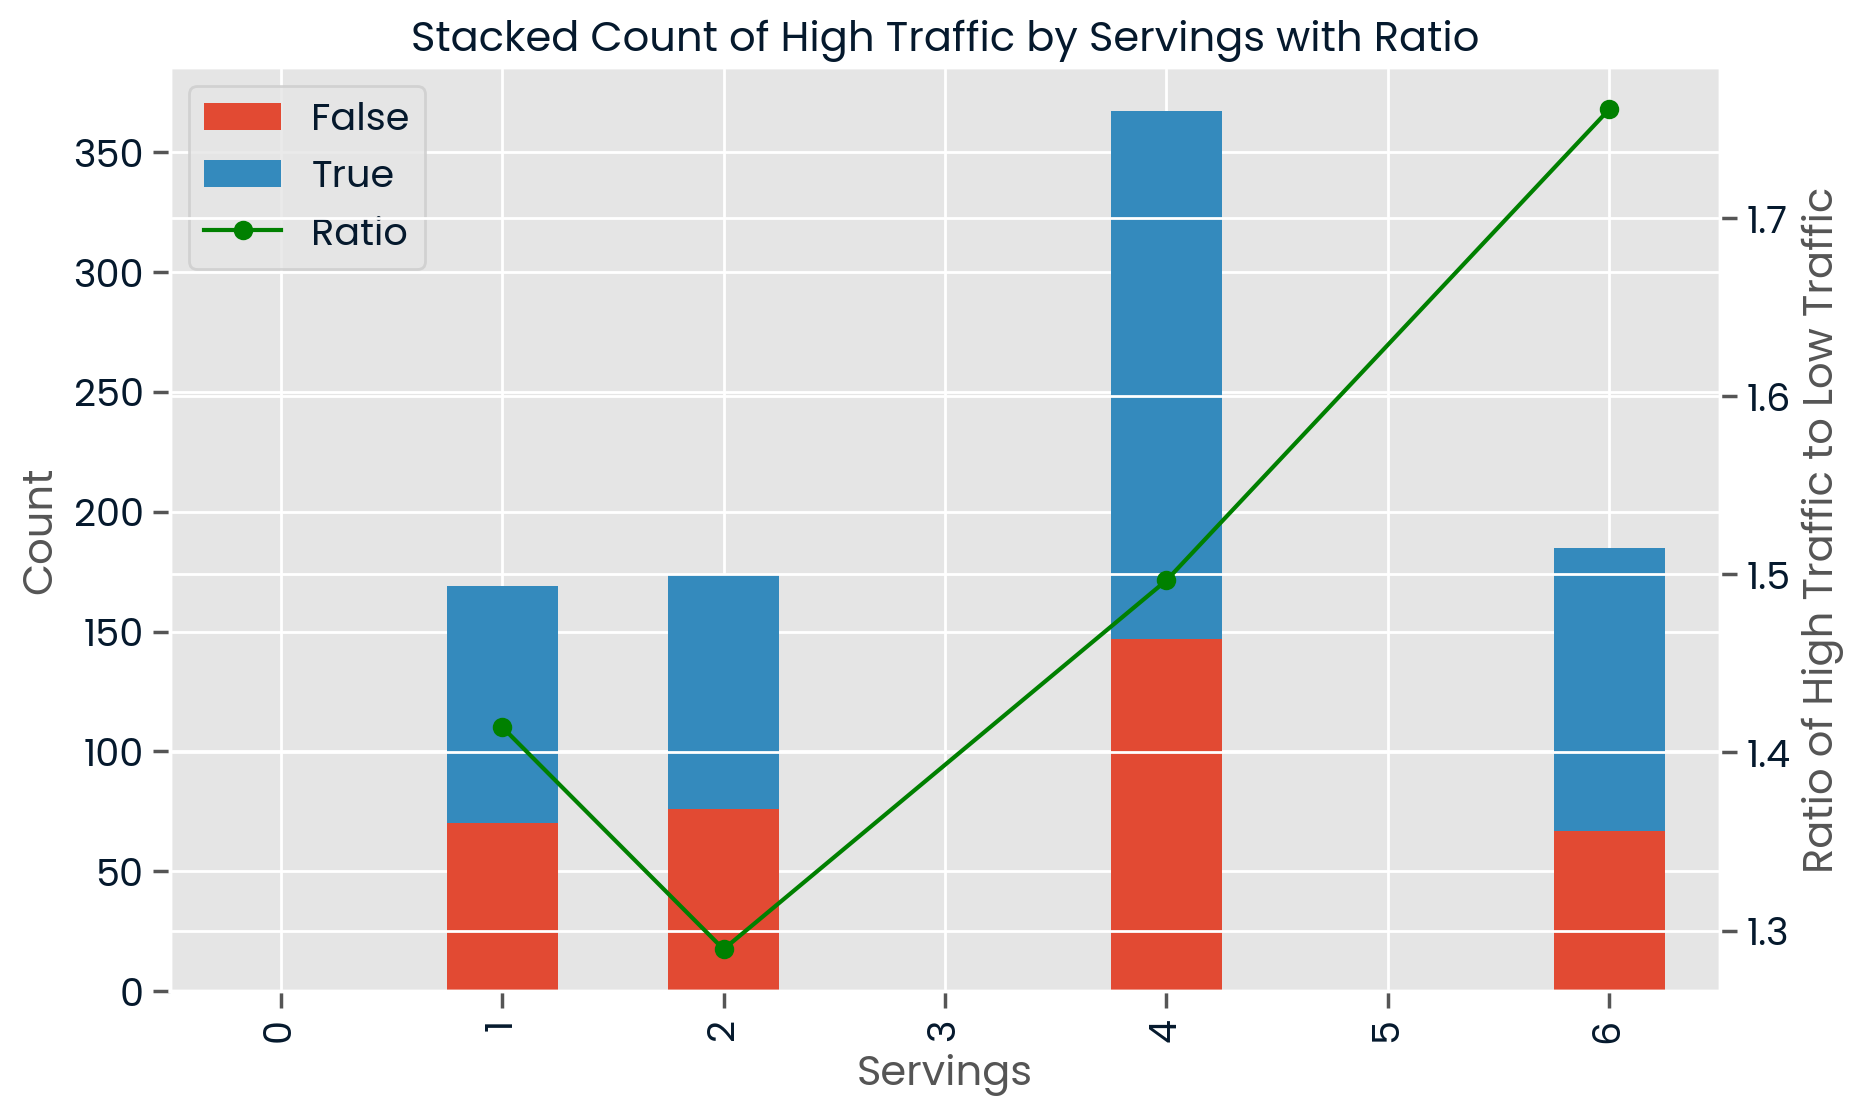

high_traffic  False  True     ratio
servings                           
0                 0     0  0.000000
1                70    99  1.414286
2                76    98  1.289474
3                 0     0  0.000000
4               147   220  1.496599
5                 0     0  0.000000
6                67   118  1.761194


In [167]:
# Group the data by 'servings' and 'high_traffic' and calculate the size of each group
count_data = clean_recipe_df.groupby(['servings', 'high_traffic']).size().unstack(fill_value=0)
print(count_data)

count_data['ratio'] = count_data[True] / count_data[False]

all_servings = [0, 1, 2, 3, 4, 5, 6]  


count_data = count_data.reindex(all_servings, fill_value=0)
count_data_reset = count_data.reset_index()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the stacked bar plot on the first axis
count_data.drop(columns=['ratio']).plot(kind='bar', stacked=True, ax=ax1, legend=False)

# Customize the plot
ax1.set_title('Stacked Count of High Traffic by Servings with Ratio')
ax1.set_xlabel('Servings')
ax1.set_ylabel('Count')

ax1.set_xticks(range(len(count_data)))  # Set x-ticks at the correct positions
ax1.set_xticklabels(count_data.index)  # Use 'servings' values as x-tick labels

# Create a second axis for the ratio (on the right)
ax2 = ax1.twinx()

count_data_reset = count_data_reset[count_data_reset['ratio'] != 0]

# Plot the ratio of high traffic to low traffic on the second axis
line, = ax2.plot(count_data_reset['servings'], count_data_reset['ratio'], marker='o', color='g', label = 'Ratio')

# Manually combine the legends
handles, labels = ax1.get_legend_handles_labels()
handles.append(line)  # Add the line plot handle to the legend
labels.append('Ratio')  # Add the line plot label

# Display the combined legend
ax1.legend(handles=handles, labels=labels, loc = 'upper left')

# Set label for the ratio axis
ax2.set_ylabel('Ratio of High Traffic to Low Traffic')
plt.savefig('traffic_by_servings_with_ratio.png', bbox_inches='tight')
# Show the plot
plt.show()
print(count_data)


high_traffic   False  True  percentage_high_traffic
category                                           
Vegetable          1    77                98.717949
Potato             5    78                93.975904
Pork               7    66                90.410959
One Dish Meal     16    51                76.119403
Meat              18    56                75.675676
Lunch/Snacks      30    52                63.414634
Dessert           29    48                62.337662
Chicken           94    69                42.331288
Breakfast         73    33                31.132075
Beverages         87     5                 5.434783


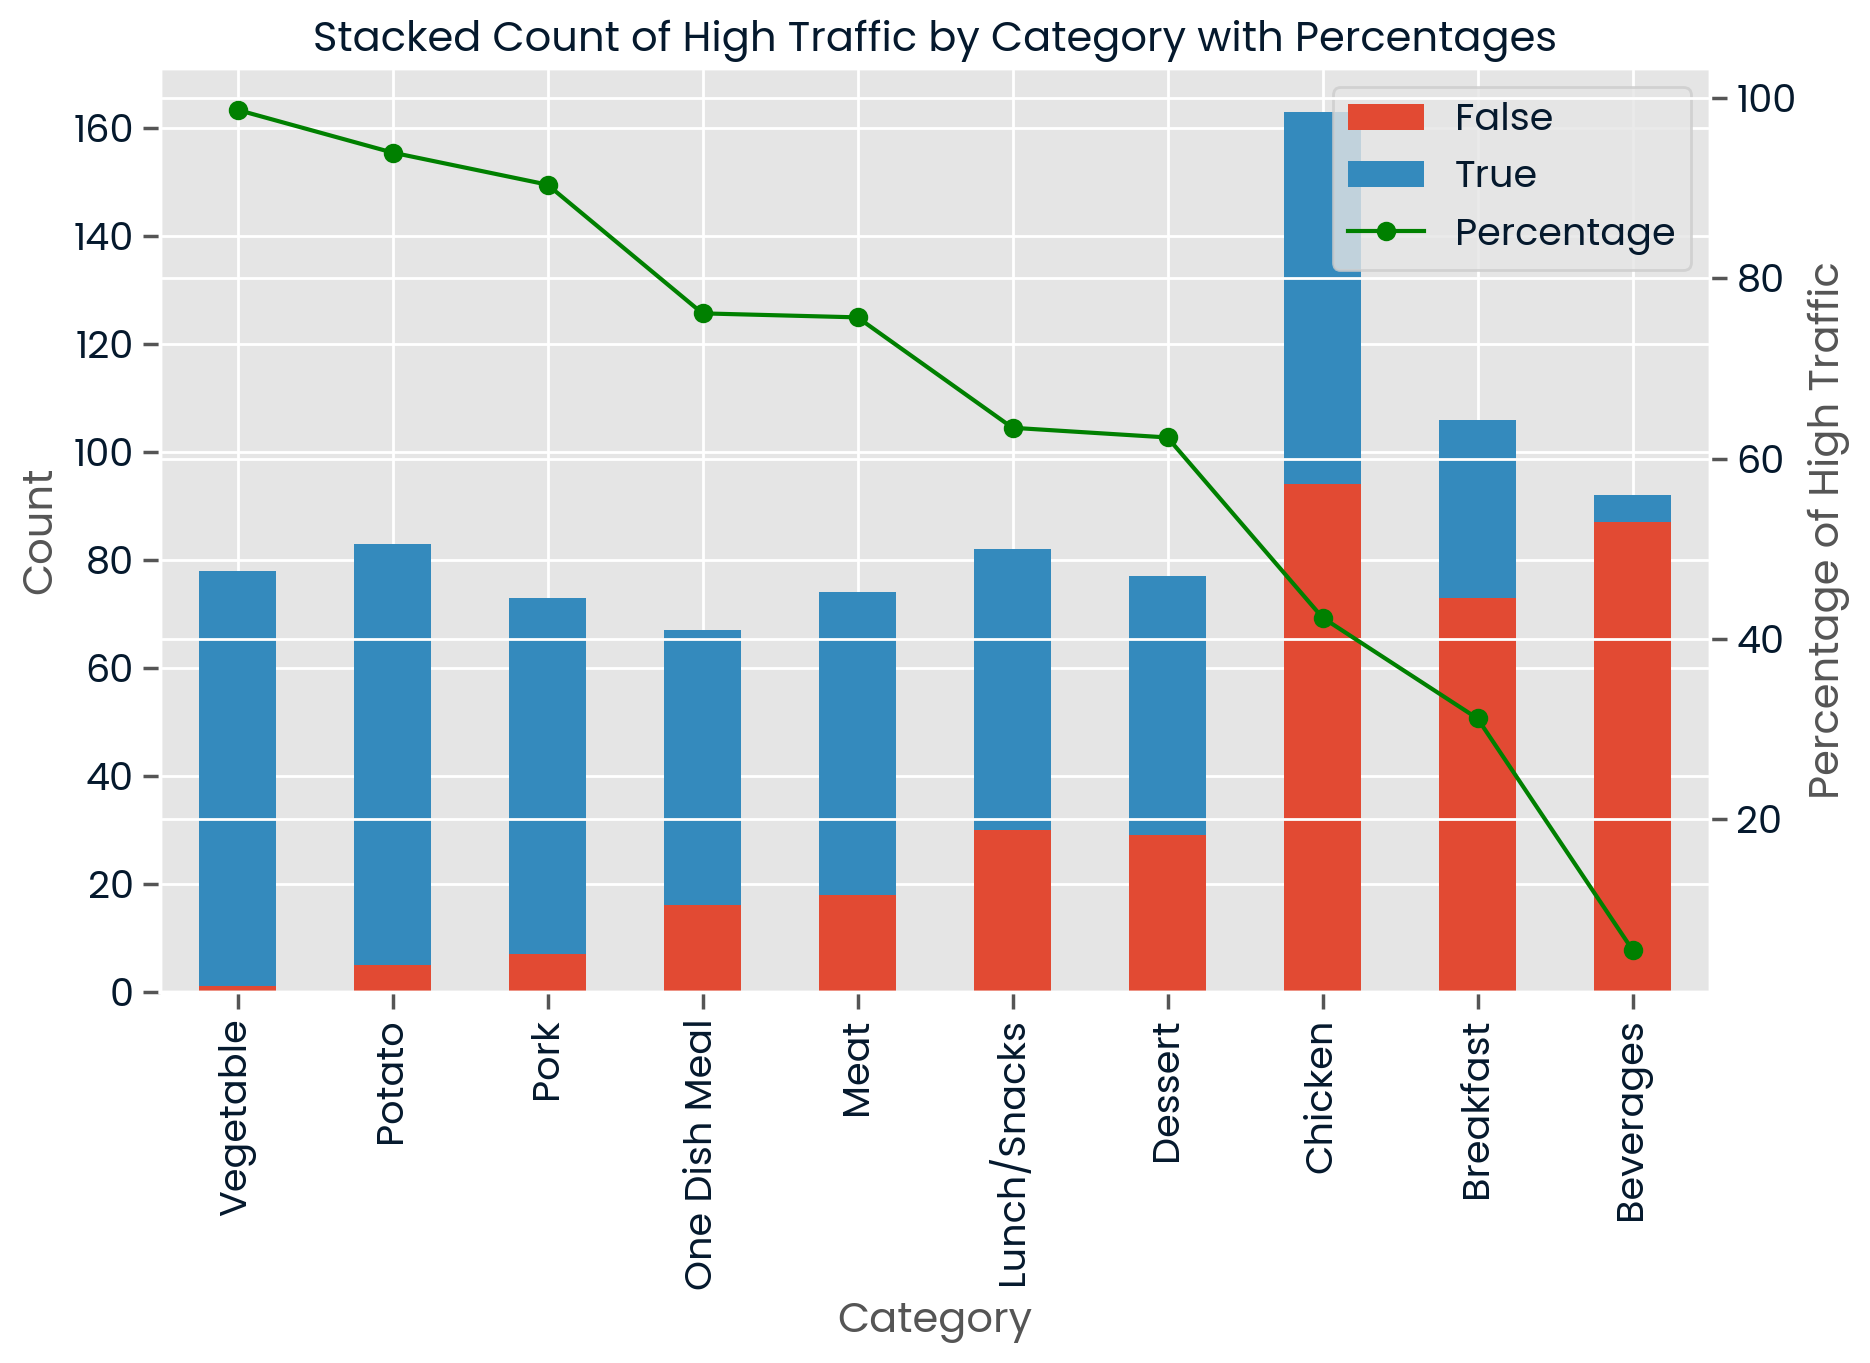

In [168]:
count_data_category = clean_recipe_df.groupby(['category', 'high_traffic']).size().unstack(fill_value=0)
count_data_category['percentage_high_traffic'] = (count_data_category[True] / (count_data_category[False] +count_data_category[True]))*100
count_data_category = count_data_category.sort_values(by='percentage_high_traffic', ascending=False)
print(count_data_category)


# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the stacked bar plot on the first axis
count_data_category.drop(columns=['percentage_high_traffic']).plot(kind='bar', stacked=True, ax=ax1, legend=False)

ax1.set_title('Stacked Count of High Traffic by Category with Percentages')
ax1.set_xlabel('Category')
ax1.set_ylabel('Count')

ax2 = ax1.twinx()
line, = ax2.plot(count_data_category.index, count_data_category['percentage_high_traffic'], marker='o', color='g', label = 'percentage_high_traffic')
ax2.set_ylabel('Percentage of High Traffic')

# Manually combine the legends
handles, labels = ax1.get_legend_handles_labels()
handles.append(line)  # Add the line plot handle to the legend
labels.append('Percentage')  # Add the line plot label

# Display the combined legend
ax1.legend(handles=handles, labels=labels, loc = 'upper right')
plt.savefig('traffic_by_category_with_percentages.png', bbox_inches='tight')

# Show the plot
plt.show()

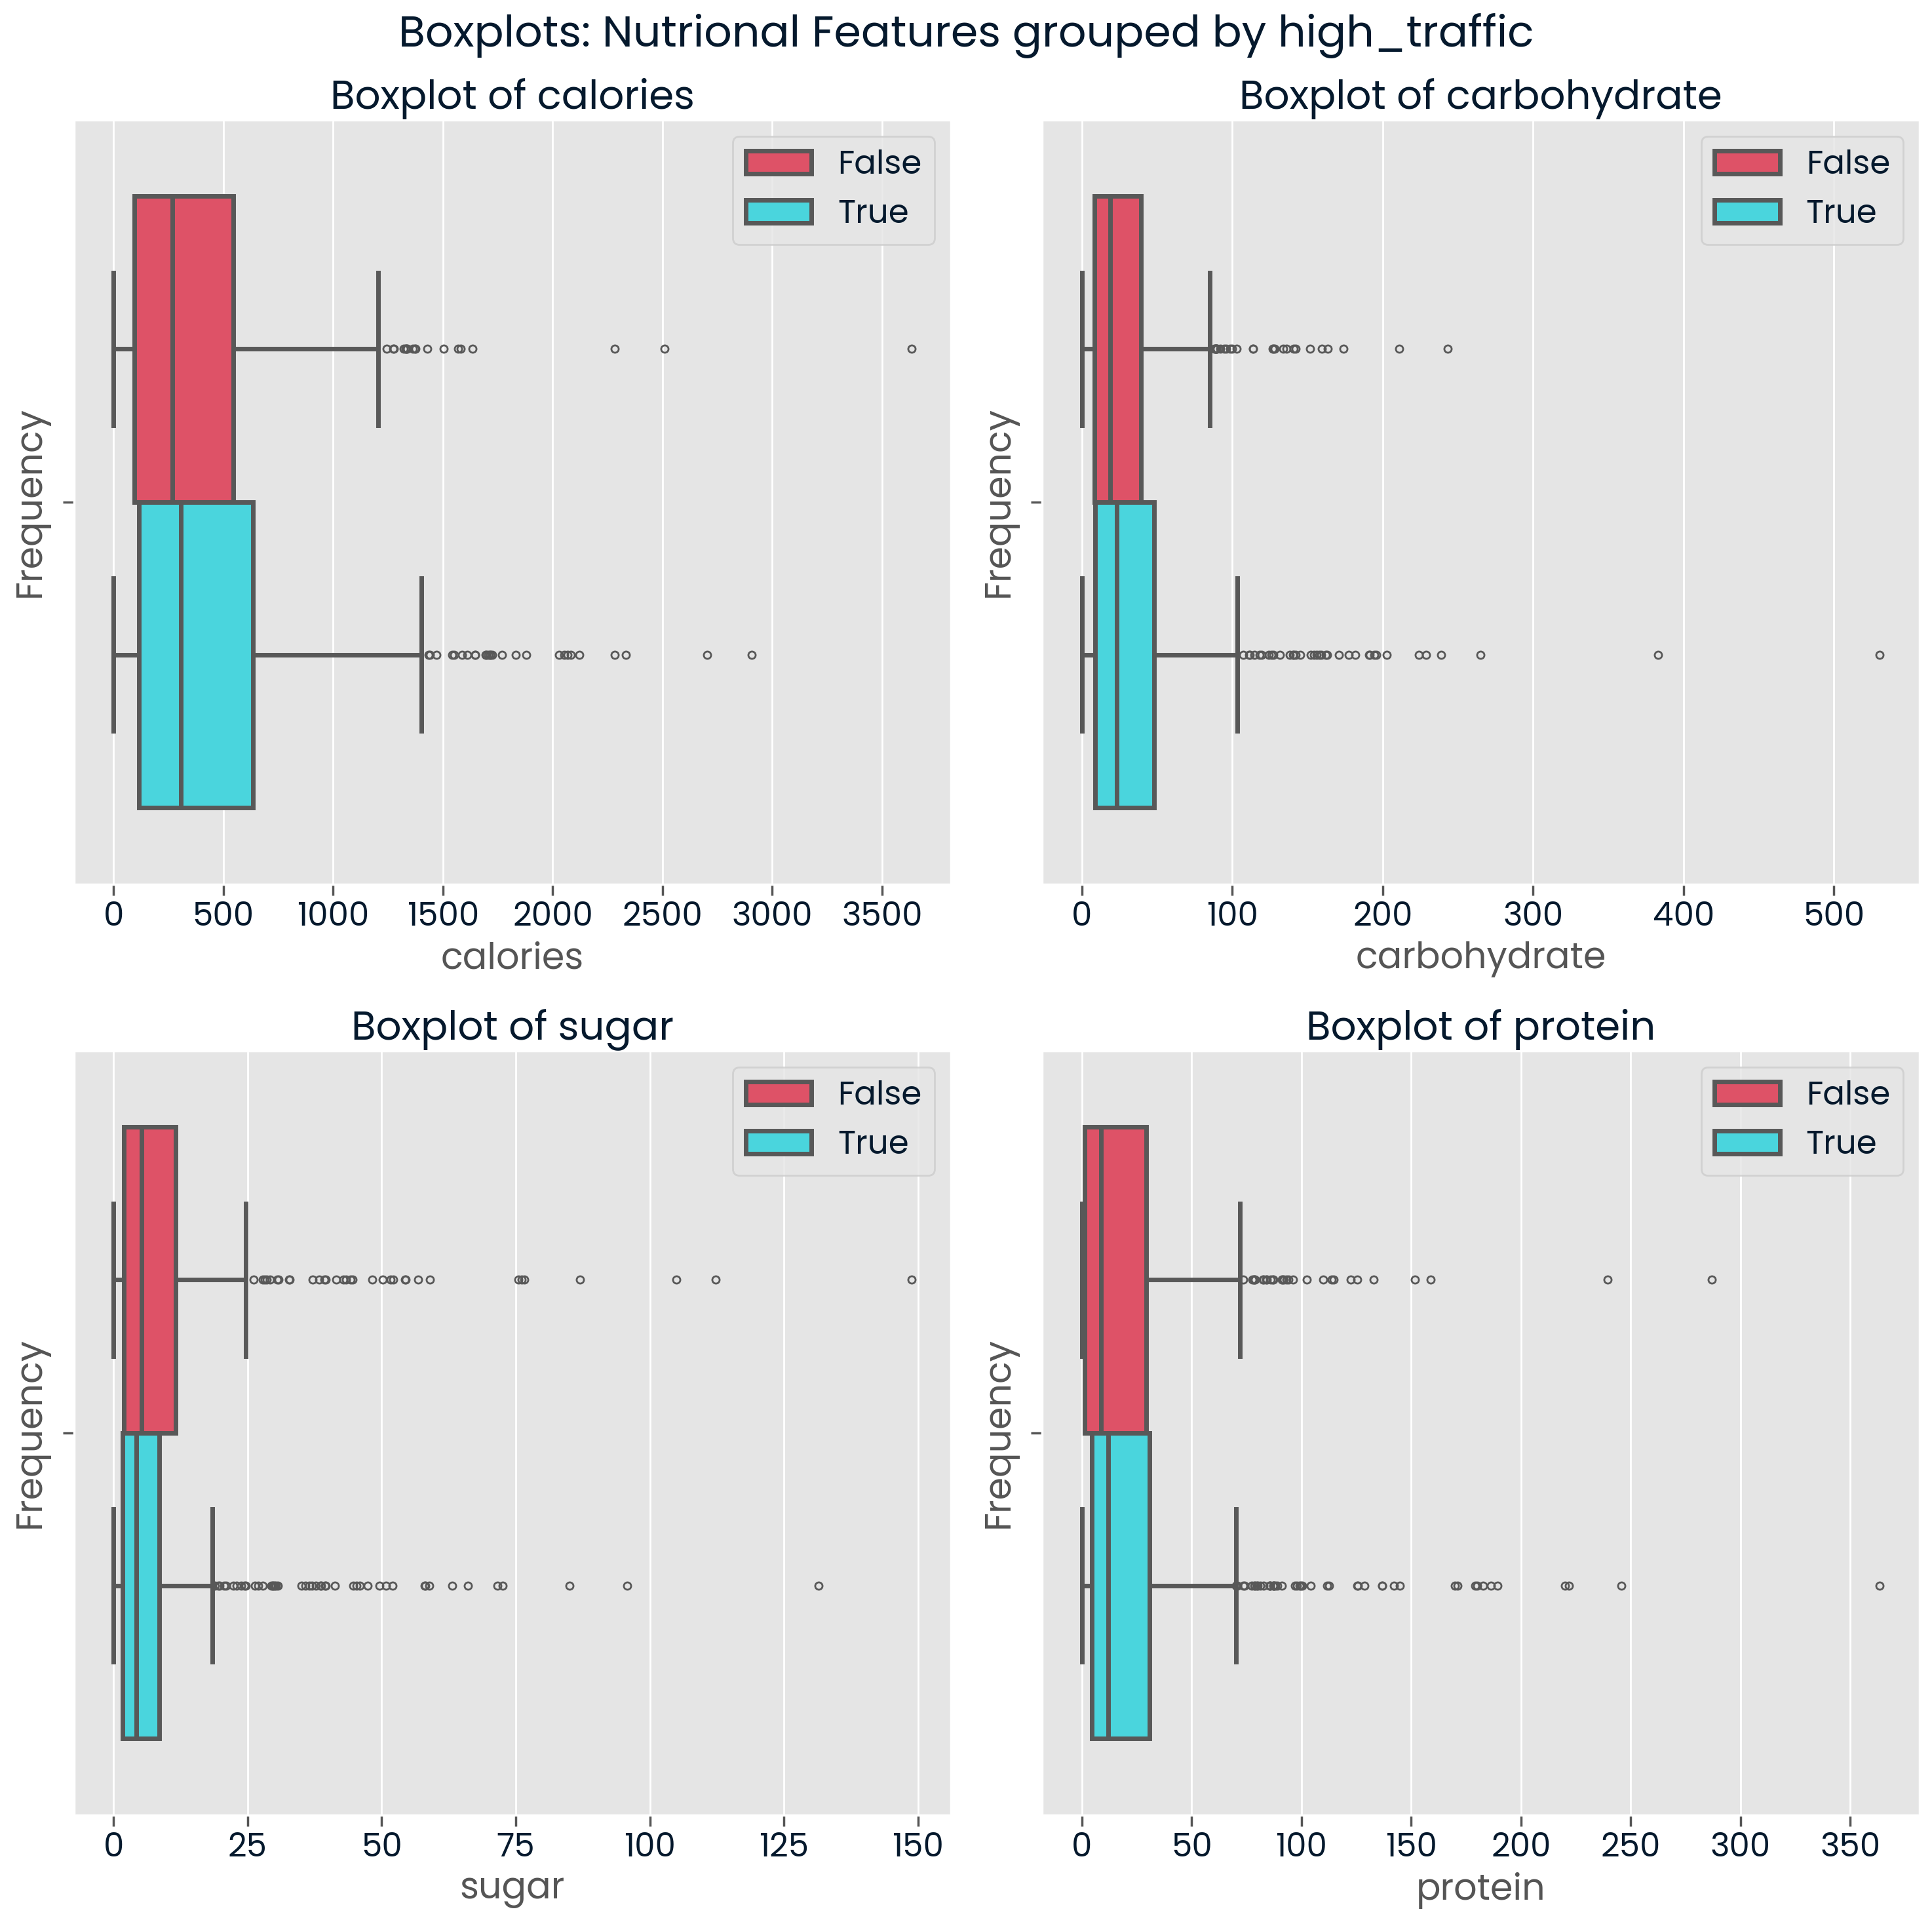

In [169]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Boxplots: Nutrional Features grouped by high_traffic', fontsize=24)
axes = axes.flatten()

palette = {False: '#f53b57', True: '#31ebf5'}

for ax, feature in zip(axes, nutritional_features):
    sns.boxplot(data=clean_recipe_df, x=feature, ax=ax, color='C1', hue = 'high_traffic', palette=palette, linewidth=2.5, flierprops={'marker': 'o', 'markersize': 4}) 
    ax.set_title(f'Boxplot of {feature}', fontsize = 22)
    ax.set_xlabel(feature, fontsize=20)  # X-axis label font size
    ax.set_ylabel('Frequency', fontsize=20)  # Y-axis label font size
    ax.tick_params(axis='x', labelsize=18) 
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc="upper right", fontsize=18) 

plt.tight_layout()
plt.savefig('Boxplots-NF_grouped_by_high_traffic.png', bbox_inches='tight')
plt.show()

# for feature in nutritional_features:
#     print(f"Statistics for {feature} grouped by high_traffic:")
    
#     stats = clean_recipe_df.groupby('high_traffic')[feature].describe()
#     print(stats[['min', '25%', '50%', '75%', 'max']])  # Print min, Q1, median, Q3, max
#     print("\n") 

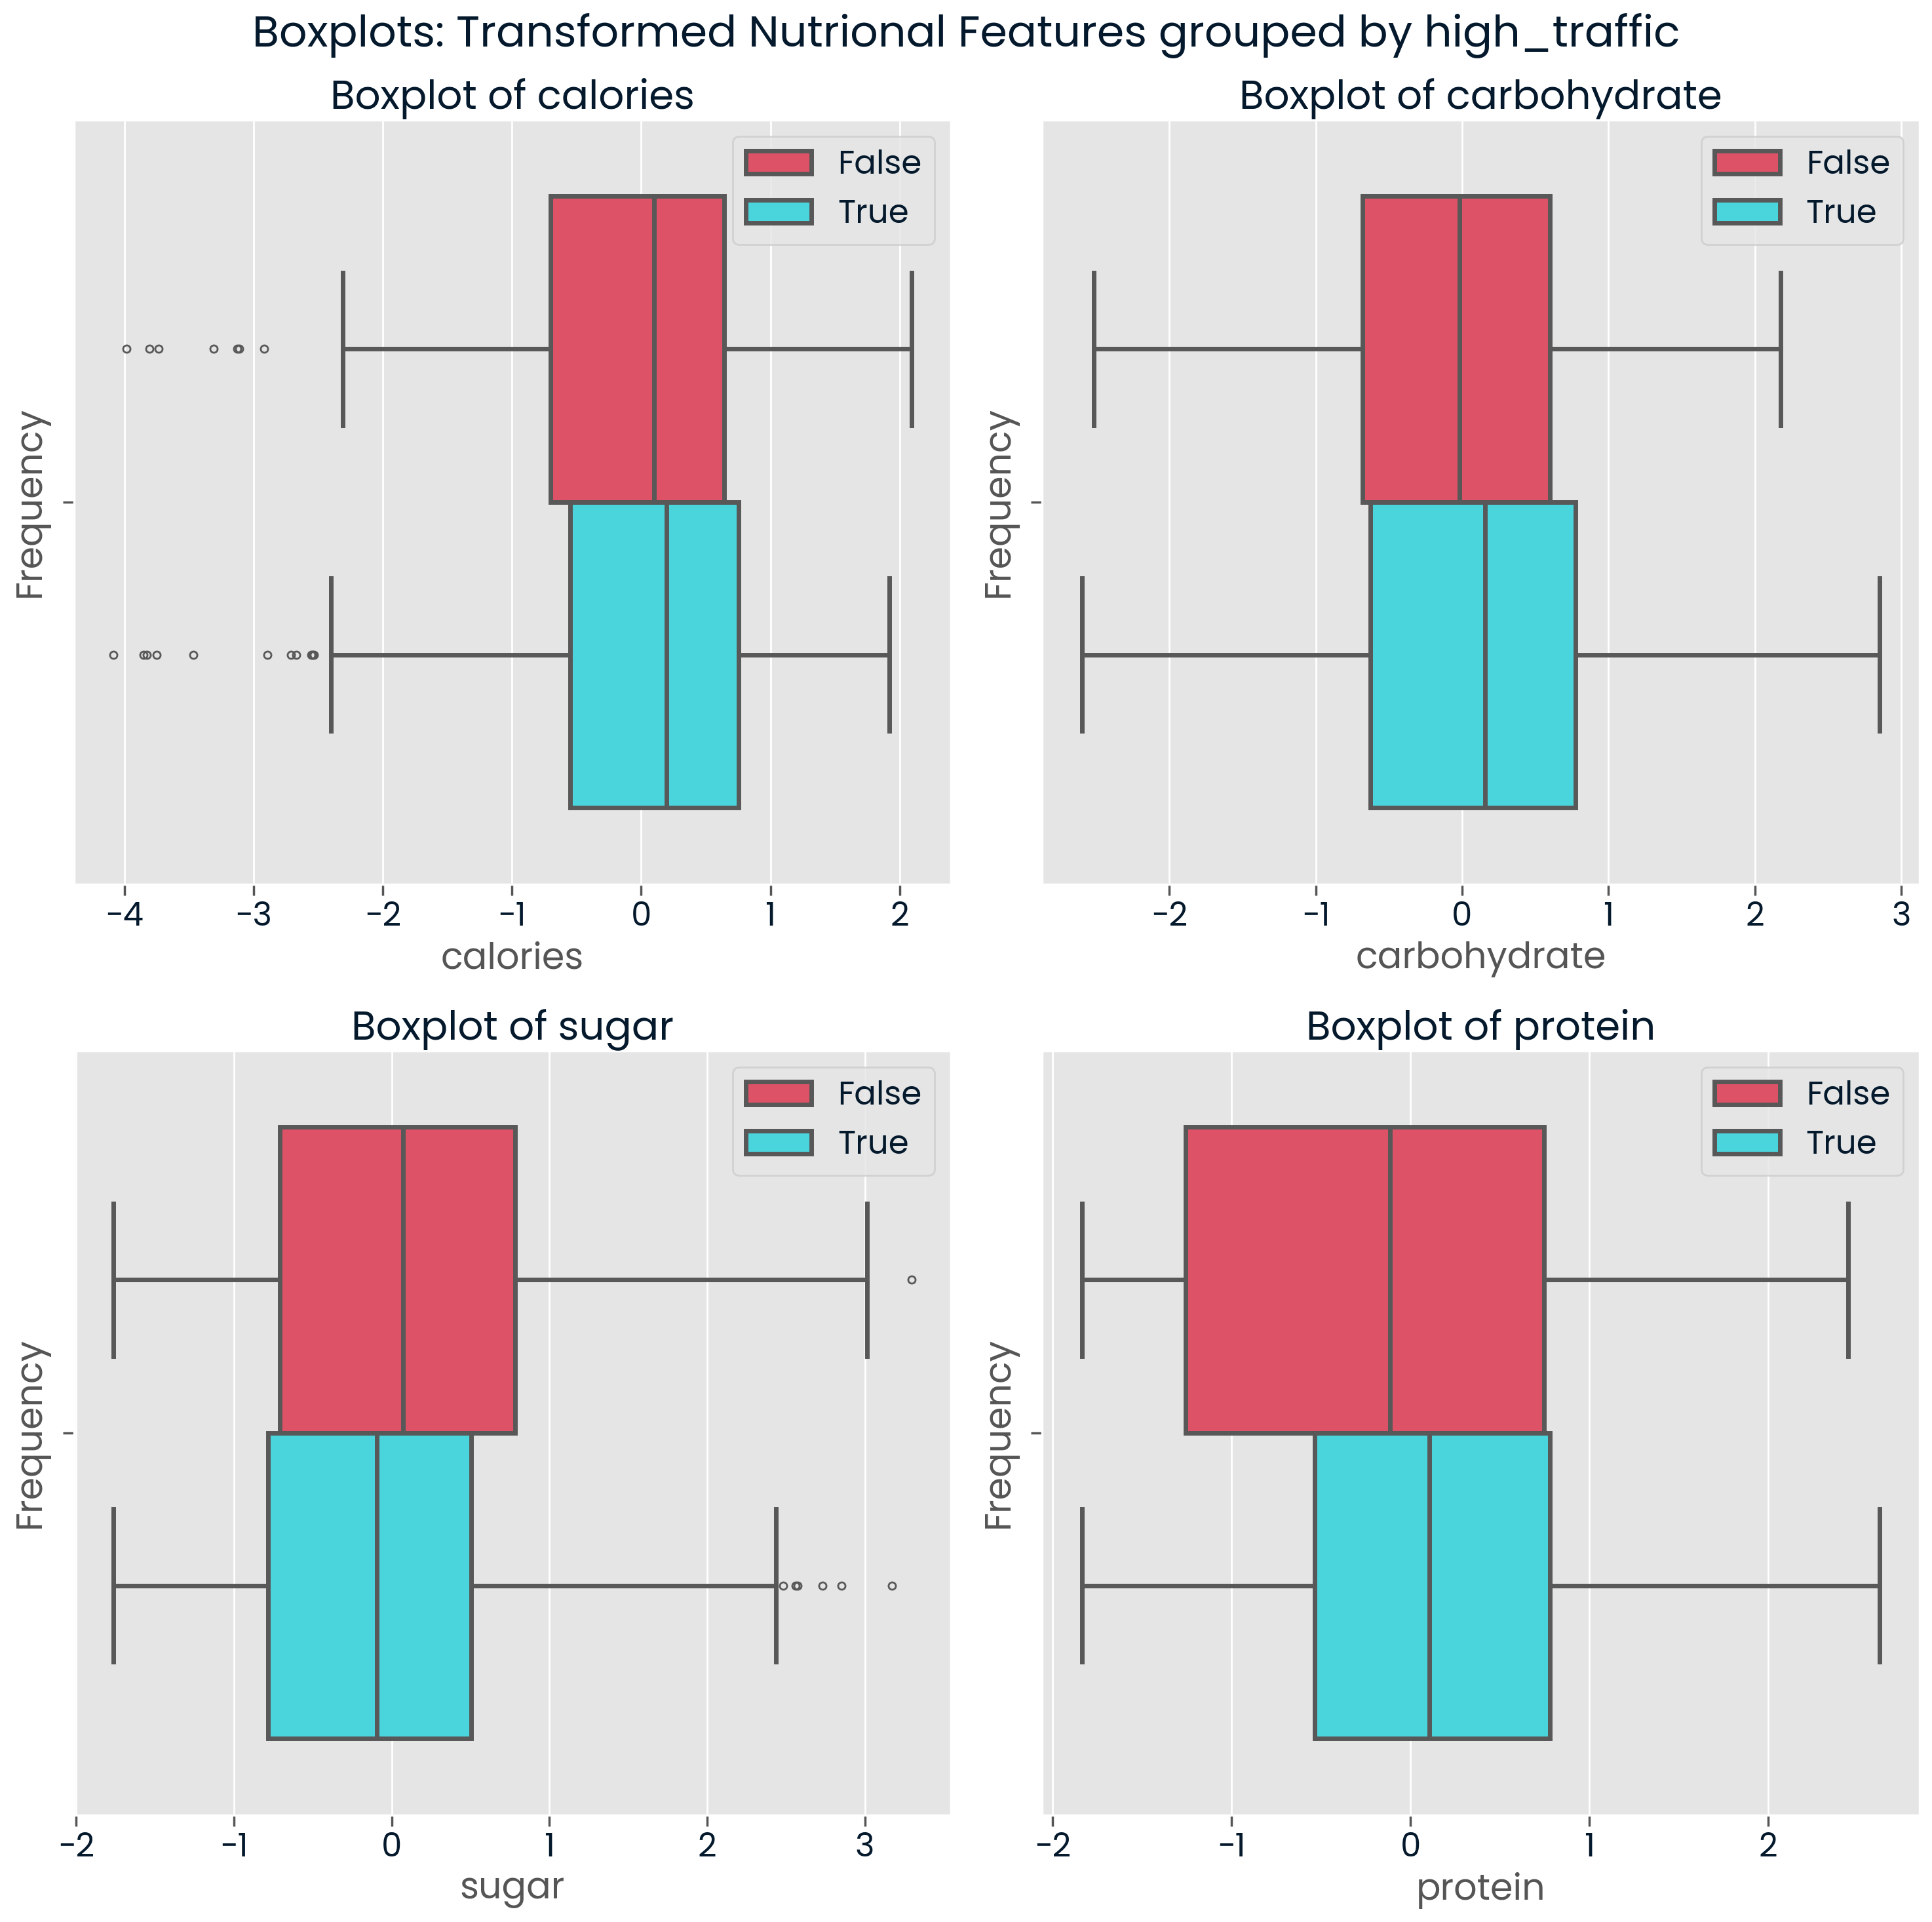

In [170]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Boxplots: Transformed Nutrional Features grouped by high_traffic', fontsize=24)
axes = axes.flatten()

palette = {False: '#f53b57', True: '#31ebf5'}

for ax, feature in zip(axes, nutritional_features):
    sns.boxplot(data=df_transformed, x=feature, ax=ax, color='C1', hue = 'high_traffic', palette=palette, linewidth=2.5, flierprops={'marker': 'o', 'markersize': 4}) 
    ax.set_title(f'Boxplot of {feature}', fontsize = 22)
    ax.set_xlabel(feature, fontsize=20)  # X-axis label font size
    ax.set_ylabel('Frequency', fontsize=20)  # Y-axis label font size
    ax.tick_params(axis='x', labelsize=18) 
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc="upper right", fontsize=18) 

plt.tight_layout()
plt.savefig('Boxplots-Transformed_NF_grouped_by_high_traffic.png', bbox_inches='tight')
plt.show()

# for feature in nutritional_features:
#     print(f"Statistics for {feature} grouped by high_traffic:")
    
#     stats = df_transformed.groupby('high_traffic')[feature].describe()
#     print(stats[['min', '25%', '50%', '75%', 'max']])  # Print min, Q1, median, Q3, max
#     print("\n")  

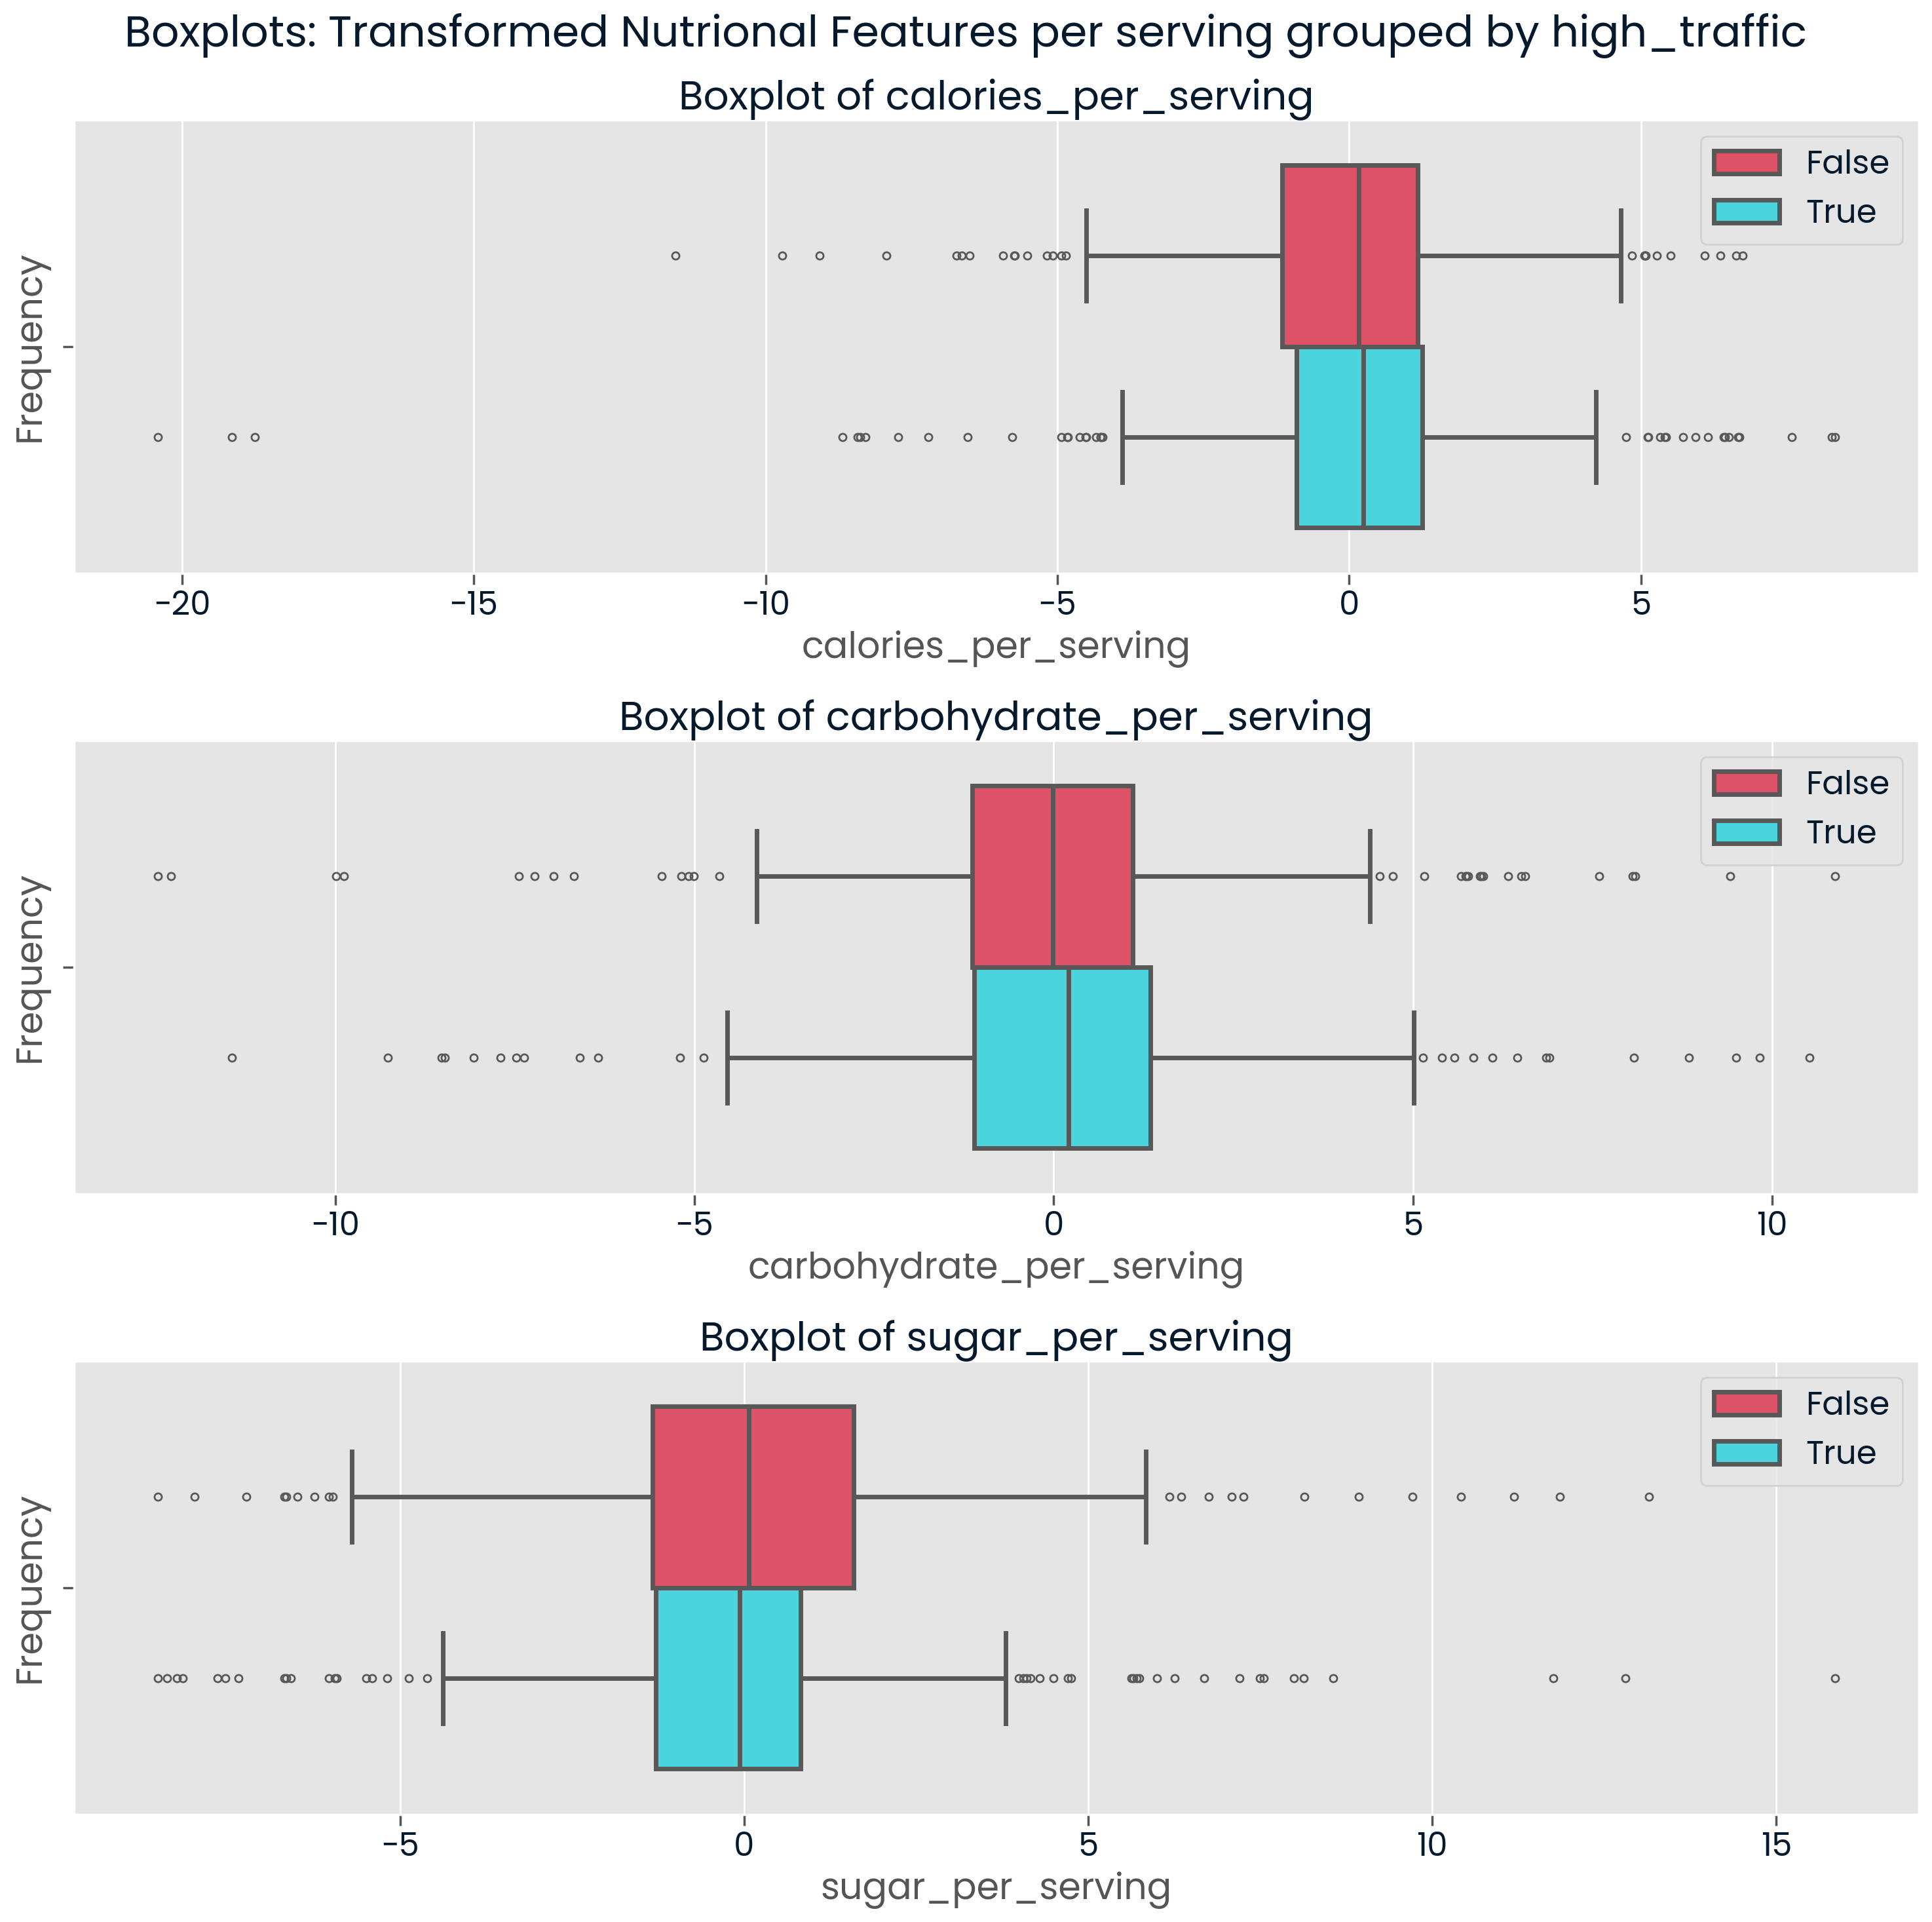

In [171]:
nutrional_featuers_new = []

for feature in nutritional_features.copy():
    if feature != 'protein':
        column_name = f'{feature}_per_serving'
        df_transformed[column_name] = df_transformed[feature] / (df_transformed['servings'])
        nutrional_featuers_new.append(column_name)        

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Boxplots: Transformed Nutrional Features per serving grouped by high_traffic', fontsize=24)
axes = axes.flatten()

palette = {False: '#f53b57', True: '#31ebf5'}

for ax, feature in zip(axes, nutrional_featuers_new):
    sns.boxplot(data=df_transformed, x=feature, ax=ax, color='C1', hue = 'high_traffic', palette=palette, linewidth=2.5, flierprops={'marker': 'o', 'markersize': 4}) 
    ax.set_title(f'Boxplot of {feature}', fontsize = 22)
    ax.set_xlabel(feature, fontsize=20)  # X-axis label font size
    ax.set_ylabel('Frequency', fontsize=20)  # Y-axis label font size
    ax.tick_params(axis='x', labelsize=18) 
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc="upper right", fontsize=18) 
    

plt.tight_layout()
plt.savefig('Boxplots-Transformed_NF_per_serving_grouped_by_high_traffic.png', bbox_inches='tight')
plt.show()

# for feature in nutritional_features:
#     print(f"Statistics for {feature} grouped by high_traffic:")
    
#     stats = df_transformed.groupby('high_traffic')[feature].describe()
#     print(stats[['min', '25%', '50%', '75%', 'max']])  # Print min, Q1, median, Q3, max
#     print("\n")  

## Model Development and Evaluation

### Data Preprocessing

To prepare the data for modelling, I normalised the numeric features using an initial log transformation followed by a scaler transformation explained in the previous section. Additionally, the categorical variables are converted into binary columns by creating dummy variables using `pd.get_dummies()`. The dataset is split into a training set and a test set using the `train_test_split` function with stratify y and a test size of 20%. This split helps avoid overfitting and allows for the evaluation of the model's generalization ability by calculating performance metrics such as accuracy, precision, and F1-score on the test data.

### Initial Model Development

For my first attempt, I used a `RandomForestClassifier` (RF) model as the target variable is a boolean and RF models are resistant to noise and outliers, and manages high-dimensional datasets effectively. The RF model builds a large number of decision trees and outputs the mode of the classes of each individual tree. However, the model was suboptimal. To improve this model I optimised the hyperparameters (hp) and implemented cross-validation (cv) folds using `GridSearch`. The two key scoring metrics for this project are accuracy and precision. Accuracy is the ratio of correctly predicted instances to the total number of instances. Meanwhile, precision is the ratio of true positive predictions to all positive predictions. 

This analysis will require an accuracy above 80% as required by the product team, and a high precision to minimise the chance of displaying a `low_traffic` recipe on the homepage. The `scoring` parameter of the `GridSearch` function will be set to precision instead of accuracy as the aim of the project is to find the model with the highest precision with an accuracy of 80%. These changes are incorporated into the RF model which increased the accuracy to 76%.

### Feature Elimination and Realization for Feature Engineering

<div align="center">
    <img src="Feature_Importance_3.png" alt="Figure 8" width="600">
</div>

After evaluating the initial model, it became clear that the nutritional features of the dataset did not significantly contribute to explaining the target variable. Therefore, feature engineering was employed to create new features that better capture the relationships within the data. These new nutritional features were created, as explained in the previous section. Additionally, Recursive Feature Elimination (RFE) was used to select features that retained the most explained variance.

To further enhance the model's accuracy, feature elimination was performed by manually removing low-variance features using the `feature_importances_` attribute of the optimized Random Forest model. The selected features, along with the variance they explain, are displayed in the figure above. These results indicated that the nutritional features in the dataset did not contribute significantly to explaining the target variable. As a result, feature engineering was employed to create new features that better capture the relationships within the data. These new nutritional features, as explained in the previous section, were created to address the gaps identified in the initial feature selection process.

To further refine the model, Recursive Feature Elimination (RFE) was used, with `RandomForestClassifier` as the estimator, to select the most important features that contain the highest explained variance.

<div align="center">
    <img src="Selected_Features_RFE.png" alt="Figure 8" width="600">
</div>
 
A final optimization of the hyperparameters was conducted using the dataset that included the newly created features, which resulted in an accuracy of 81% and a precision of 82%.

### Comparison Model

After optimizing the Random Forest model and achieving satisfactory performance with an accuracy of 81% and precision of 82%, a comparison model was created using `LogisticRegression` (LR) to evaluate whether a simpler model could achieve similar or better results. Logistic Regression was chosen because it is an interpretable, and efficient classification model, particularly well-suited for binary classification problems, while RF can be difficult to understand and computationally complex.

An attempt to reduce the model's False Positives was made by tuning the `class_weight` parameter in the Logistic Regression model. By adjusting the class weights, the model is encouraged to place more importance on correctly classifying the negative class (True Negatives) rather than predicting positive instances (which could be False Positives). By assigning a higher weight to the negative class, the model becomes more cautious in predicting positives, reducing the likelihood of incorrectly classifying negative instances as positive, thereby reducing False Positives and increasing precision. However, the `GridSearch` persistently selected a balanced class weight for the Logistic Regression model, which could be due to the nearly balanced nature of the dataset, with 60% high traffic data and 40% low traffic.

After optimizing the Logistic Regression (LR) model, the results showed an accuracy of 78% and a precision of 83%. While the accuracy is lower compared to the Random Forest (RF) model, which achieved an accuracy of 81%, the higher precision in the LR model suggests that it may be better at correctly identifying positive instances. This indicates that, with further optimization, the LR model has the potential to outperform the RF model, especially in scenarios where minimizing False Positives is critical.

### Ensemble Model

To further enhance the performance, an ensemble method was employed, combining multiple models to leverage their individual strengths. The ensemble model integrates three base learners: RF, LR, and Support Vector Classifier (SVC). This approach helps to reduce the variance and bias, potentially improving accuracy and robustness.

A Voting Classifier was used to combine the predictions from these three models. The Voting Classifier aggregates the predictions of each base model and selects the final class prediction based on the majority vote. This project uses Soft Voting where the probabilities of each class are averaged, and the class with the highest average probability is selected.

The RF model is robust to overfitting and effective with high-dimensional data, while the LR model provides strong linear decision boundaries with regularisation. Also, the SVC model is effective for both linear and non-linear data. The ensemble model benefits from the diversity of the different algorithms.

Despite the theoretical advantage of combining different types of models, the ensemble approach did not lead to a performance improvement over the individual models. The ensemble model had an accuracy of 79% and a precision of 82% which is slightly worse compared to the RF model.

In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


def lr_model(X_train, y_train, SEED):
    """
    Fits lr model and returns best lr model
    """
    # LogisticRegression
    from sklearn.linear_model import LogisticRegression

    # Define the parameter grid
    params_lr = {
        'C': [0.03,0.04, 0.05,0.06],  # Inverse of regularization strength
        'penalty': ['l1'],  # Regularization type
        'solver': ['liblinear'],  # Optimization algorithm
        'max_iter': [25,50],  # Maximum number of iterations for solvers
        'class_weight': ['balanced'],  # Class weights
    }

    # Example usage with GridSearchCV
    lr = LogisticRegression(random_state = SEED)

    grid_lr = GridSearchCV(estimator = lr,
                        param_grid=params_lr,
                        scoring='precision',
                        cv=10,
                        n_jobs=-1,
                        verbose=1)

    # Fit GridSearchCV to the data
    grid_lr.fit(X_train, y_train)

    best_model_lr = grid_lr.best_estimator_

    # Get the best parameters
    best_params = grid_lr.best_params_
    print("Best parameters found: ", best_params)

    return best_model_lr

def gbc_model(X_train, y_train, SEED):
    """
    fits gbc model and returns best model
    """
    params_gbc = {
        'n_estimators': [200], 
        'learning_rate': [0.01, 0.02],  
        'max_depth': [3, 5], 
        'subsample': [0.8, 1.0],  
    }

    # Initialize Gradient Boosting Classifier
    gbc = GradientBoostingClassifier(random_state=SEED)

    grid_gbc = GridSearchCV(estimator=gbc,
                            param_grid=params_gbc,
                            scoring='precision',
                            cv=10,
                            n_jobs=-1,
                            verbose=1)

    # Fit GridSearchCV to the data
    grid_gbc.fit(X_train, y_train)

    # Retrieve the best estimator and parameters
    best_model_gbc = grid_gbc.best_estimator_
    best_params_gbc = grid_gbc.best_params_

    print("Best parameters for GBC: ", best_params_gbc)

    return best_model_gbc

def rf_model(X_train, y_train, SEED):
    """
    Fits rf model and returns best rf model
    """
    params_rf = {
        'n_estimators': [75,100, 125],  # Number of trees in the forest
        'max_depth': [3,4,5, 6, 7],  # Depth of the tree
        'min_samples_leaf': [0.02, 0.04, 0.06],  # Minimum samples per leaf
    }

    rf = RandomForestClassifier(random_state=SEED)
    grid_rf = GridSearchCV(estimator = rf,
                        param_grid=params_rf,
                        scoring='precision',
                        cv=10,
                        n_jobs=-1,
                        verbose=1)

    grid_rf.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_rf.best_params_
    print("Best parameters found: ", best_params)

    best_model_rf = grid_rf.best_estimator_

    # Get feature importances
    importances = best_model_rf.feature_importances_

    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance Score')
    plt.title('Feature Importances')
    plt.show()

    return best_model_rf

RFE Columns to Drop: ['high_traffic', 'category_Dessert', 'category_Lunch/Snacks', 'category_Meat', 'category_One Dish Meal']
X train columns: Index(['recipe', 'protein', 'category_Beverages', 'category_Breakfast',
       'category_Chicken', 'category_Pork', 'category_Potato',
       'category_Vegetable', 'sugar_per_serving', 'carbohydrate_per_serving',
       'calories_per_serving'],
      dtype='object')
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best parameters found:  {'C': 0.06, 'class_weight': 'balanced', 'max_iter': 25, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 10 folds for each of 45 candidates, totalling 450 fits
Best parameters found:  {'max_depth': 7, 'min_samples_leaf': 0.02, 'n_estimators': 75}


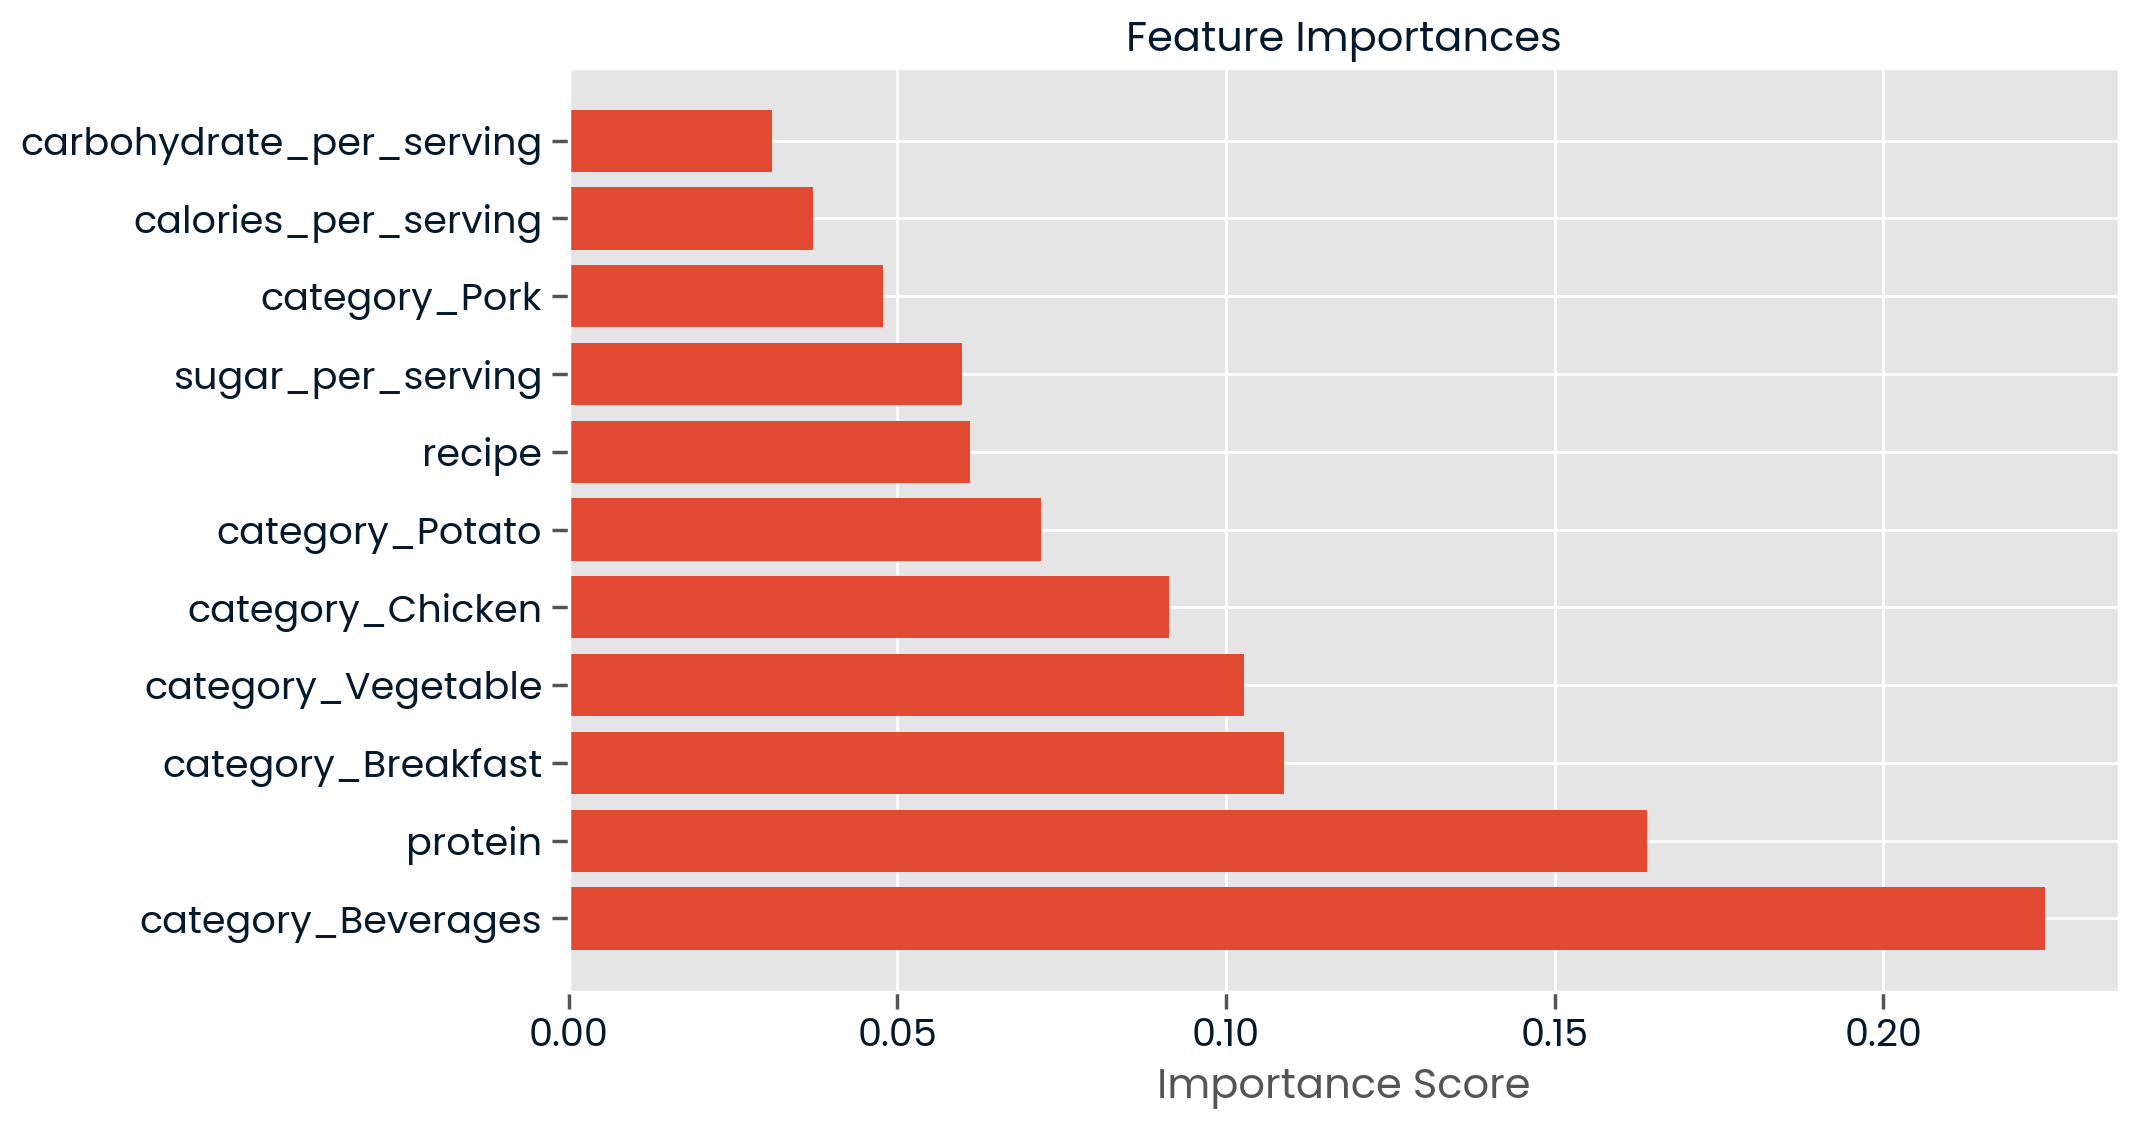

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best parameters for GBC:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Logistic Regression Test Accuracy: 0.78
Logistic Regression Test Precision: 0.83
Random Forest Test Accuracy: 0.81
Random Forest Test Precision: 0.82
Gradient Boosting Classifier Test Accuracy: 0.78
Gradient Boosting Classifier Test Precision: 0.82
-------------------
VC Accuracy: 0.79
VC Precision: 0.82
Voting Classifier (VC) Confusion Matrix:
 [[53 19]
 [19 88]]
Random Forest (RF) Confusion Matrix:
 [[52 20]
 [14 93]]
Logistic Regression (LR) Confusion Matrix:
 [[54 18]
 [21 86]]


In [173]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix

scaler = StandardScaler()
mm_scaler = MinMaxScaler()
SEED = 9

list_to_drop = ['servings', 'category_Dessert', 'category_One Dish Meal', 'category_Lunch/Snacks', 'category_Meat', 'calories', 'sugar', 'carbohydrate', 'category_Pork', 'recipe','high_traffic'] # Gives accuracy of 0.80, no new transformation

nutritional_features = ['sugar','carbohydrate','calories','protein']

def pre_formating(df, list_nutritional_features):
    """
    Function to create dummy variables and create columns out of the existing features.
    New columns will be created for the nutrional features divide per serving
    """
    # Creates dummy variables
    df = pd.get_dummies(df, columns=['category'], prefix='category')

    # RF score 0.81
    for feature in nutritional_features.copy():
        if feature != 'protein':
            column_name = f'{feature}_per_serving'
            df[column_name] = df[feature] / (df['servings'])
            list_nutritional_features.append(column_name)
            df.drop(feature, axis=1, inplace=True)

    df.drop(['servings'], axis = 1, inplace = True)

    return df

def format_data_to_model(df, dropped_list):
    """
    train_test_split and drop lists
    """
    X_df = df.drop(dropped_list, axis=1)
    y_df = df['high_traffic']

    X_train, X_test, y_train, y_test = train_test_split(X_df,
                                       y_df,
                                       test_size = 0.2, # size of test data
                                       random_state = SEED,
                                       stratify=y_df)

    return X_train, X_test, y_train, y_test

def transform_data(df, scaler, min_max_scaler, test=False):
    """
    Transform the input DataFrame by applying log transformations, 
    dummy categorical variables, and scaling to specific features.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data to transform.
    test (bool): A flag indicating whether the DataFrame is for testing 
                 (True) or training (False). If True, uses 
                 `transform()` instead of `fit_transform()` to avoid 
                 data leakage.

    Returns:
    pd.DataFrame: The transformed DataFrame with log-transformed 
                  nutritional features, dummy categorical 
                  features, and scaled values for servings.
    """ 
    #Avoids DataLeakage using test

    # Log transform
    for feature in nutritional_features:
        if feature in df.columns:  
            df[feature] = np.log1p(df[feature])
    
    available_nutritional_features = [feature for feature in nutritional_features if feature in df.columns]
    
    # Scales Data
    if test == False:
        if available_nutritional_features:  
            df[available_nutritional_features] = scaler.fit_transform(df[available_nutritional_features])
        if 'servings' in df.columns:
            df['servings'] = mm_scaler.fit_transform(df[['servings']])
    elif test == True:
        if available_nutritional_features:  
            df[available_nutritional_features] = scaler.transform(df[available_nutritional_features])
        if 'servings' in df.columns:
            df['servings'] = mm_scaler.transform(df[['servings']])

    return df


def rfe_selection(X_train_rfe, y_train_rfe, n_features_to_select):
    """
    RFE selection to select key features and to return the datasets that are used for the models.
    """
    rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42), 
                       n_features_to_select=n_features_to_select, 
                       step=1)
    rfe_selector.fit(X_train_rfe, y_train_rfe)
    
    selected_features = X_train_rfe.columns[rfe_selector.support_].tolist()

    return selected_features

def RFE_code(clean_recipe_df, nutritional_features, num_features):

    clean_recipe_df = pre_formating(clean_recipe_df, nutritional_features)
    all_columns = clean_recipe_df.columns.tolist()
    X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = format_data_to_model(clean_recipe_df, ['high_traffic'])

    X_train_rfe = transform_data(X_train_rfe, scaler, mm_scaler, False)
    X_test_rfe = transform_data(X_test_rfe, scaler, mm_scaler, True)
    list_to_keep = rfe_selection(X_train_rfe, y_train_rfe, num_features)
    list_to_drop_rfe = [col for col in all_columns if col not in list_to_keep]
    # list_to_drop_rfe.append('high_traffic')
    print(f"RFE Columns to Drop: {list_to_drop_rfe}")
    X_train, X_test, y_train, y_test = format_data_to_model(clean_recipe_df, list_to_drop_rfe)

    X_train = transform_data(X_train, scaler, mm_scaler, False)
    X_test = transform_data(X_test, scaler, mm_scaler, True)

    return X_train, X_test, y_train, y_test

def save_metrics_to_txt(accuracy_dict, precision_dict, cm_dict, file_name):
    with open(file_name, 'w') as file:
        # Loop through each classifier name
        for clf_name in accuracy_dict:
            file.write(f"{clf_name}:\n")
            
            # Write Accuracy
            accuracy = accuracy_dict[clf_name]
            file.write(f"    Accuracy: {accuracy:.2f}\n")
            
            # Write Precision
            precision = precision_dict[clf_name]
            file.write(f"    Precision: {precision:.2f}\n")
            
            # Write Confusion Matrix
            cm = cm_dict[clf_name]
            file.write("\n")

            file.write(f"    Confusion Matrix:\n")
            file.write(f"    {cm[0]}    [TN, FP]\n")
            file.write(f"    {cm[1]}    [FN, TP]\n")
            file.write("\n")
    return

# Ensemble Learning

SEED = 9

X_train, X_test, y_train, y_test = RFE_code(clean_recipe_df, nutritional_features, num_features=11)
print(f"X train columns: {X_train.columns}")

best_model_lr = lr_model(X_train, y_train, SEED)
best_model_rf = rf_model(X_train, y_train, SEED)
best_model_gbc = gbc_model(X_train, y_train, SEED)


classifiers = [('Logistic Regression', best_model_lr),
            ('Random Forest', best_model_rf),
            ('Gradient Boosting Classifier', best_model_gbc)
            ]

cm_dict = {}
precision_score_dict = {}
accuracy_score_dict = {}

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_score_dict[clf_name] = accuracy
    print(f"{clf_name} Test Accuracy: {accuracy:.2f}")
    cm = confusion_matrix(y_test, y_pred)
    cm_dict[clf_name] = cm
    precision = precision_score(y_test, y_pred)
    precision_score_dict[clf_name] = precision
    print(f"{clf_name} Test Precision: {precision:.2f}")

vc = VotingClassifier(estimators = classifiers, voting = 'soft')
print("-------------------")
vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)
accuracy_vc = accuracy_score(y_test, y_pred_vc)
precision_vc = precision_score(y_test, y_pred_vc)
cm_vc = confusion_matrix(y_test, y_pred_vc)

# Append VC results to dictionaries
accuracy_score_dict['Voting Classifier'] = accuracy_vc
precision_score_dict['Voting Classifier'] = precision_vc
cm_dict['Voting Classifier'] = cm_vc

print(f"VC Accuracy: {accuracy_vc:.2f}")
print(f"VC Precision: {precision_vc:.2f}")


print("Voting Classifier (VC) Confusion Matrix:\n", cm_vc)

print("Random Forest (RF) Confusion Matrix:\n", cm_dict['Random Forest'])
print("Logistic Regression (LR) Confusion Matrix:\n", cm_dict['Logistic Regression'])

save_metrics_to_txt(accuracy_score_dict, precision_score_dict, cm_dict, 'model_results_RF81.txt')

## Results

| Metric       | RF Model    | LR Model    |
|--------------|-------------|-------------|
| **Accuracy** | 81.0%       | 78.2%       |
| **Precision**| 82.3%       | 82.7%       |
| **Recall**   | 86.9%       | 80.4%       |
| **F1-Score** | 0.843       | 0.814       |

The models were compared using key metrics derived from their confusion matrices: accuracy, precision, recall, and F1-score. F1 is the harmonic mean of recall and precision. This provides a comprehensive view of their performance in terms of both overall prediction accuracy and their ability to correctly identify popular recipes while minimising unpopular ones.

### Evaluate by Business Criteria


From a business perspective, the RF model outperforms the LR model in predicting popular recipes, which is critical for driving higher traffic and subscriptions. A Key Performance Indicator (KPI) for this model is precision, as the company risks losing traffic and subscriptions if unpopular recipes (False Positives) are shown on the homepage. Additionally, accuracy is another important KPI, as the product team requires the model's accuracy to be above 80%. This ensures that the model is correctly predicting recipes as popular or unpopular with a high level of overall correctness, meeting the product team's expectations.

The RF model's higher recall (86.9%) and F1-score (0.843) indicate its superior ability to correctly identify popular recipes, ensuring that the homepage features the most engaging content. While the LR model shows slightly higher precision, its lower recall (80.4%) and F1-score (0.814) suggest that it may miss a significant portion of popular recipes, potentially impacting traffic and engagement. Therefore, the RF model is the more effective choice for this task, as it strikes a better balance between maximizing popular recipe predictions and minimizing the display of less popular ones, aligning with the product team's goal of improving website traffic and subscriptions. Furthermore, it is the only model with an accuracy of 80% as required by the product team.

## Recommendations

To enhance the recipe selection process, it is recommended to prioritise precision in the model to minimise the display of unpopular recipes, thereby avoiding a loss of traffic and subscriptions. Additionally, continuous monitoring and retraining of the model should be implemented to ensure that the predictions remain relevant and accurate as user preferences evolve. A valuable feature can be added by collecting data on subscriptions bought after visiting a recipe, which can help identify which recipes contribute most to profit. Incorporating user feedback on recipe interactions will also help improve the model over time, as it allows for real-time adjustments based on actual user engagement. Finally, as more data is collected, the requirement for a recipe to qualify as high traffic should be increased, ensuring that only the best-performing recipes are selected for the homepage. This approach will refine the model’s ability to display the most impactful recipes, driving both engagement and subscriptions.